# Data retrieval & Set up

In [1]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.6.14-py3-none-any.whl size=105119 sha256=6bf25fef3269eec2e88799b087ac74f26cadad651f9dfe5401c16452e9260ad7
  Stored in directory: /root/.cache/pip/wheels/d7/54/06/8a8f40cb39536605feb9acaacd0237a95eba39e5065e6392f4
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.6.14
    Uninstalling kaggle-1.6.14:
      Successfully uninstalled kaggle-1.6.14


In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 72 bytes


In [3]:
dataset_download = "unitednations/international-energy-statistics" #@param {type:"string"}
!kaggle datasets download -d $dataset_download
!ls

Dataset URL: https://www.kaggle.com/datasets/unitednations/international-energy-statistics
License(s): other
 68% 5.00M/7.35M [00:00<00:00, 36.2MB/s]
100% 7.35M/7.35M [00:00<00:00, 50.4MB/s]
international-energy-statistics.zip  sample_data


In [4]:
!mkdir input_data
!unzip international-energy-statistics.zip -d input_data

Archive:  international-energy-statistics.zip
  inflating: input_data/Energy-Questionnaire-Guidelines.pdf  
  inflating: input_data/all_energy_statistics.csv  


# Data Cleansing

In [5]:
!pip install pandas

In [6]:
import pandas as pd

In [7]:
source_path='/content/input_data/all_energy_statistics.csv'
df_input=pd.read_csv(source_path)
df_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1189482 entries, 0 to 1189481
Data columns (total 7 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   country_or_area        1189482 non-null  object 
 1   commodity_transaction  1189482 non-null  object 
 2   year                   1189482 non-null  int64  
 3   unit                   1189482 non-null  object 
 4   quantity               1189482 non-null  float64
 5   quantity_footnotes     163946 non-null   float64
 6   category               1189482 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 63.5+ MB


In [8]:
df_input.head()

country_or_area               commodity_transaction  year  \
0         Austria  Additives and Oxygenates - Exports  1996   
1         Austria  Additives and Oxygenates - Exports  1995   
2         Belgium  Additives and Oxygenates - Exports  2014   
3         Belgium  Additives and Oxygenates - Exports  2013   
4         Belgium  Additives and Oxygenates - Exports  2012   

                     unit  quantity  quantity_footnotes  \
0  Metric tons,  thousand       5.0                 NaN   
1  Metric tons,  thousand      17.0                 NaN   
2  Metric tons,  thousand       0.0                 NaN   
3  Metric tons,  thousand       0.0                 NaN   
4  Metric tons,  thousand      35.0                 NaN   

                   category  
0  additives_and_oxygenates  
1  additives_and_oxygenates  
2  additives_and_oxygenates  
3  additives_and_oxygenates  
4  additives_and_oxygenates

In [9]:
# Fix data types
df_input['country_or_area'] = df_input['country_or_area'].astype(str)
df_input['commodity_transaction'] = df_input['commodity_transaction'].astype(str)
df_input['category'] = df_input['category'].astype(str)
df_input['year'] = pd.to_numeric(df_input['year'], errors='coerce')
df_input['unit'] = df_input['unit'].astype(str)
df_input['quantity_footnotes'] = pd.to_numeric(df_input['unit'], errors='coerce')
print(df_input.dtypes)

country_or_area           object
commodity_transaction     object
year                       int64
unit                      object
quantity                 float64
quantity_footnotes       float64
category                  object
dtype: object


In [10]:
# Check for duplicates
duplicates = df_input.duplicated().sum()
print(f'Number of duplicates: {duplicates}')

# Remove duplicates
df_input = df_input.drop_duplicates()
print(f'Shape of the dataframe after removing duplicates: \n Rows:{df_input.shape[0]}')

Number of duplicates: 0
Shape of the dataframe after removing duplicates: 
 Rows:1189482


In [11]:
# List the columns in the dataset
columns = df_input.columns
columns


Index(['country_or_area', 'commodity_transaction', 'year', 'unit', 'quantity',
       'quantity_footnotes', 'category'],
      dtype='object')

In [12]:
# Get unique values for the 'category' column
unique_categories = df_input['category'].unique()

# Display unique categories
print("Unique Categories:")
for category in unique_categories:
    print(category)


Unique Categories:
additives_and_oxygenates
animal_waste
anthracite
aviation_gasoline
bagasse
biodiesel
biogases
biogasoline
bitumen
black_liquor
blast_furnace_gas
brown_coal_briquettes
brown_coal
charcoal
coal_tar
coke_oven_coke
coking_coal
conventional_crude_oil
direct_use_of_geothermal_heat
direct_use_of_solar_thermal_heat
electricity_net_installed_capacity_of_electric_power_plants
ethane
falling_water
fuel_oil
fuelwood
gas_coke
gas_oil_diesel_oil
gasoline_type_jet_fuel
gasworks_gas
geothermal
hard_coal
heat
hydro
industrial_waste
kerosene_type_jet_fuel
lignite
liquified_petroleum_gas
lubricants
motor_gasoline
municipal_wastes
naphtha
natural_gas_including_lng
natural_gas_liquids
nuclear_electricity
of_which_biodiesel
of_which_biogasoline
oil_shale_oil_sands
other_bituminous_coal
other_coal_products
other_hydrocarbons
other_kerosene
other_liquid_biofuels
other_oil_products_n_e_c
other_recovered_gases
other_vegetal_material_and_residues
paraffin_waxes
patent_fuel
peat
peat_products
p

In [13]:
# Get unique values for the 'commodity_transaction' column
unique_commodity_transaction = df_input['commodity_transaction'].unique()

# Display unique categories
print("Unique Commodity transaction:")
for category in unique_commodity_transaction:
    print(category)


Unique Commodity transaction:
Additives and Oxygenates - Exports
Additives and Oxygenates - Imports
Additives and Oxygenates - Production
Additives and Oxygenates - Receipts from other sources
Additives and Oxygenates - Stock changes
Additives and Oxygenates - Total energy supply
Additives and Oxygenates - transfers and recycled products
Additives and Oxygenates - Transformation
Additives and Oxygenates - Transformation in oil refineries
Animal waste - Consumption by commerce and public services
Animal waste - Consumption by food and tobacco 
Animal waste - Consumption by households
Animal waste - Consumption by manufacturing, construction and non-fuel industry
Animal waste - Consumption by non-metallic minerals 
Animal waste - Consumption by other
Animal waste - Consumption by other manuf., const. and non-fuel min. ind.
Animal waste - Consumption in agriculture, forestry and fishing
Animal waste - Consumption not elsewhere specified (industry)
Animal waste - Consumption not elsewhere 

# Exploratory Analysis

In [14]:
!pip install matplotlib
!pip install seaborn
!pip install geopandas

## 1. Trends in Renewable energy adoption

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

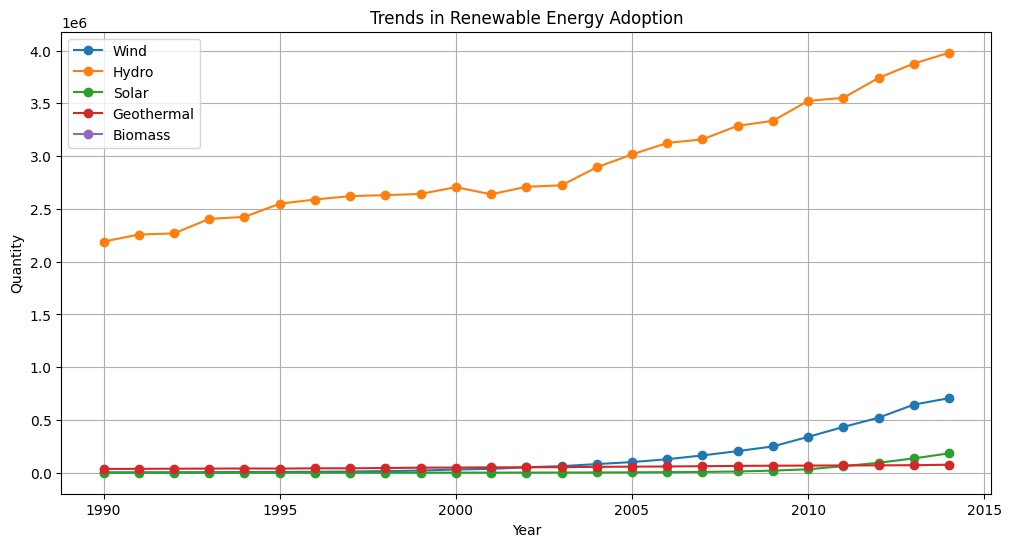

In [16]:
# Define renewable sources based on the unique values identified
renewable_sources = {
    'Wind': 'Electricity - total wind production',
    'Hydro': 'Electricity - total hydro production',
    'Solar': 'Electricity - total solar production',
    'Geothermal': 'Electricity - total geothermal production',
    'Biomass': 'Electricity - total biomass production'
}

plt.figure(figsize=(12, 6))

# Each renewable source and plot
for source_name, source_value in renewable_sources.items():
    renewable_data = df_input[df_input['commodity_transaction'] == source_value]
    renewable_trends = renewable_data.groupby('year').agg({'quantity': 'sum'}).reset_index()

    # Plot each source
    plt.plot(renewable_trends['year'], renewable_trends['quantity'], marker='o', label=source_name)

# Plot title and labels
plt.title('Trends in Renewable Energy Adoption')
plt.xlabel('Year')
plt.ylabel('Quantity')
plt.legend()
plt.grid(True)
plt.show()


## 2. Electricity energy demands

In [17]:
!pip install requests
!pip install Python-IO

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.1/296.1 kB 3.2 MB/s eta 0:00:00
  Created wheel for Python-IO: filename=Python_IO-0.3-py3-none-any.whl size=1645 sha256=952d01b47fb322e910fd256e63c3849213d862df4c9b010af58e8042a5e3e478
  Stored in directory: /root/.cache/pip/wheels/a9/91/ae/9903bc69afe99aacf5b40680c7b94b709dd83eaa52262ae857
Successfully built Python-IO


In [18]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import requests
from io import StringIO
import matplotlib.colors as mcolors

In [19]:
#Define Continents
continents = {
    'Africa': ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Rep.', 'Chad', 'Comoros', 'Congo', 'Côte d\'Ivoire', 'Dem. Rep. of the Congo', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Réunion', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Swaziland', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe'],
    'Asia': ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei Darussalam', 'Cambodia', 'China', 'China, Hong Kong SAR', 'China, Macao SAR', 'Cyprus', 'Georgia', 'India', 'Indonesia', 'Iran (Islamic Rep. of)', 'Iraq', 'Israel', 'Japan', 'Jordan', "Korea, Dem.Ppl's.Rep.", 'Korea, Republic of', 'Kuwait', "Lao People's Dem. Rep.", 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'Oman', 'Pakistan', 'Philippines', 'Qatar', 'Saudi Arabia', 'Singapore', 'Sri Lanka', 'Syrian Arab Republic', 'Taiwan', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Viet Nam', 'Yemen'],
    'North America': ['Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Canada', 'Costa Rica', 'Cuba', 'Dominica', 'Dominican Republic', 'El Salvador', 'Grenada', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'St. Kitts-Nevis', 'St. Lucia', 'St. Vincent-Grenadines', 'Trinidad and Tobago', 'United States'],
    'South America': ['Argentina', 'Bolivia (Plur. State of)', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela (Bolivar. Rep.)'],
    'Europe': ['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kazakhstan', 'Kosovo', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russian Federation', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom'],
    'Oceania': ['Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia (Fed. States of)', 'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu'],
    'Antarctica': ['Antarctic Fisheries']
}

In [20]:
def get_key_from_value(x, d:dict):
    for item in d.items():
        for val in item[1]:
            if x == val: return (item[0])

In [21]:
df_input['continent'] = df_input['country_or_area'].map(lambda x: get_key_from_value(x, continents))

df_input[0:5]

country_or_area               commodity_transaction  year  \
0         Austria  Additives and Oxygenates - Exports  1996   
1         Austria  Additives and Oxygenates - Exports  1995   
2         Belgium  Additives and Oxygenates - Exports  2014   
3         Belgium  Additives and Oxygenates - Exports  2013   
4         Belgium  Additives and Oxygenates - Exports  2012   

                     unit  quantity  quantity_footnotes  \
0  Metric tons,  thousand       5.0                 NaN   
1  Metric tons,  thousand      17.0                 NaN   
2  Metric tons,  thousand       0.0                 NaN   
3  Metric tons,  thousand       0.0                 NaN   
4  Metric tons,  thousand      35.0                 NaN   

                   category continent  
0  additives_and_oxygenates    Europe  
1  additives_and_oxygenates    Europe  
2  additives_and_oxygenates    Europe  
3  additives_and_oxygenates    Europe  
4  additives_and_oxygenates    Europe

In [22]:
elec_demand = df_input[df_input['commodity_transaction'].str.contains('Electricity - Gross demand')]

elec_demand.head()

country_or_area       commodity_transaction  year  \
1097271     Afghanistan  Electricity - Gross demand  2014   
1097272     Afghanistan  Electricity - Gross demand  2013   
1097273     Afghanistan  Electricity - Gross demand  2012   
1097274     Afghanistan  Electricity - Gross demand  2011   
1097275     Afghanistan  Electricity - Gross demand  2010   

                            unit  quantity  quantity_footnotes  \
1097271  Kilowatt-hours, million    4486.8                 NaN   
1097272  Kilowatt-hours, million    4371.4                 NaN   
1097273  Kilowatt-hours, million    3887.0                 NaN   
1097274  Kilowatt-hours, million    3451.0                 NaN   
1097275  Kilowatt-hours, million    2732.0                 NaN   

                  category continent  
1097271  total_electricity      Asia  
1097272  total_electricity      Asia  
1097273  total_electricity      Asia  
1097274  total_electricity      Asia  
1097275  total_electricity      Asia

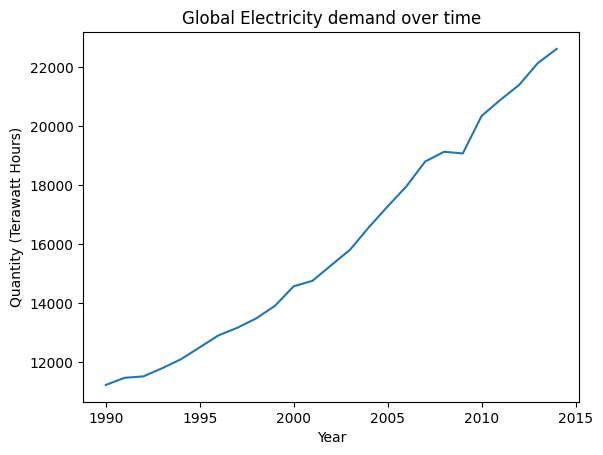

In [23]:
global_elec_demand = elec_demand.groupby("year")["quantity"].sum()
global_elec_demand = global_elec_demand / 1000 # convert to terawatt hours

global_elec_demand

plt = sns.lineplot(data=global_elec_demand)
plt.set_title("Global Electricity demand over time")
plt.set_xlabel("Year")
plt.set_ylabel("Quantity (Terawatt Hours)");

In [24]:
# @title Electricity energy demands for the year 2000-2014

# Filter data for years 2010-2014
elec_demand_2010_2014 = elec_demand[(elec_demand['year'] >= 2000) & (elec_demand['year'] <= 2014)]

# Summarize electricity demand by country
elec_demand_agg = elec_demand_2010_2014.groupby('country_or_area').agg({'quantity': 'sum'}).reset_index()

# Calculate the total electricity demand globally from 2000-2014
total_electricity_demand = elec_demand_2010_2014['quantity'].sum()

# Calculate the percentage of total electricity demand for each country
elec_demand_agg['percentage'] = (elec_demand_agg['quantity'] / total_electricity_demand) * 100
elec_demand_agg.head()

country_or_area    quantity  percentage
0     Afghanistan   30556.200    0.011048
1         Albania   97469.600    0.035240
2         Algeria  557320.000    0.201498
3  American Samoa    2496.643    0.000903
4         Andorra    7974.700    0.002883

In [25]:
# URL of the GeoJSON data for the world map
geojson_url = 'https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json'

# Fetch the GeoJSON data from the URL
response = requests.get(geojson_url)
geojson_data = response.text

# Read the GeoJSON data into a GeoDataFrame
world = gpd.read_file(StringIO(geojson_data))

# Merge with electricity demand data
world = world.merge(elec_demand_agg, how='left', left_on='name', right_on='country_or_area')


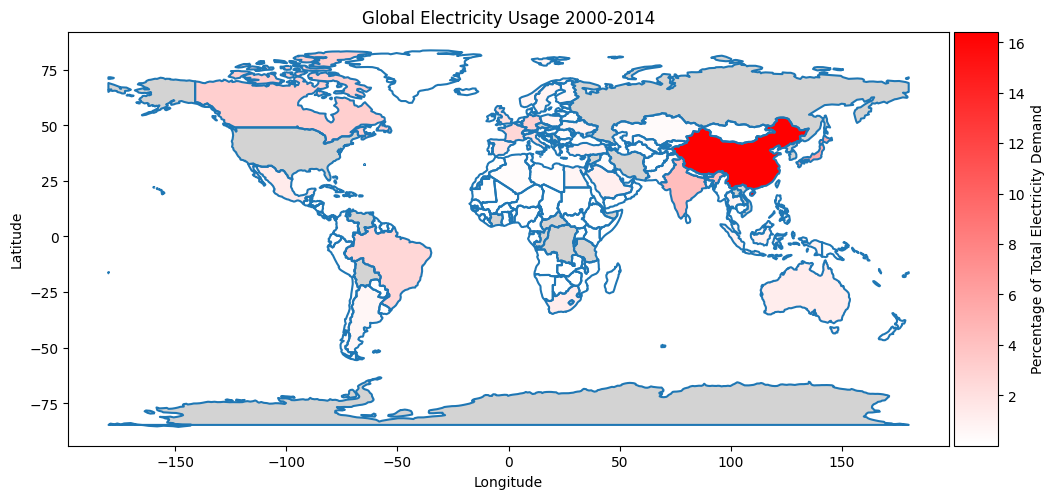

In [26]:
import matplotlib.pyplot as plt
# Define a custom colormap from white to red
cmap = mcolors.LinearSegmentedColormap.from_list("white_red", ["white", "red"])

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
world.boundary.plot(ax=ax)
world.plot(column='percentage', cmap=cmap, ax=ax, legend=False,
           missing_kwds={'color': 'lightgrey', 'label': 'No data'})

# Add titles and labels
plt.title('Global Electricity Usage 2000-2014')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Scale the colorbar correctly
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)

# Colorbar
norm = plt.Normalize(vmin=world['percentage'].min(), vmax=world['percentage'].max())
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, cax=cax)
cbar.set_label('Percentage of Total Electricity Demand')

plt.show()

## 3. G10 Countries 2024

> G10 is a term that is used to describe the Group of Ten. This is a group of seven countries that have the largest and most advanced economies in the world. These are the most industrialized nations in the world.

When breaking down the numbers, the G10 countries represent over 46% of the gross domestic product globally based on nominal values. These countries represent over 32% of the GDP based on purchasing power parity. The countries in this group have more than 62% of the global net wealth – or a total of $300 trillion.

The nations that are part of G10 include United States, Canada, Germany, France, Italy, Japan, United Kingdom,Netherlands,Switzerland, Sweden and Belgium.

Source for Reference: https://worldpopulationreview.com/country-rankings/g10-countries

In [27]:
# Since quantity_footnotes is missing lots of value, we are going to drop this column and also it is not adding any value to our analysis
#Since continent is not going to be used at the visualazation and the prediction model later, we are going to drop this column
df2 = df_input.drop(['quantity_footnotes','continent'], axis=1)
df2.columns

Index(['country_or_area', 'commodity_transaction', 'year', 'unit', 'quantity',
       'category'],
      dtype='object')

In [28]:
# To avoid any problem on the country_or_area names in the upper and lower, we are going to convert all the names in this & other column to lower case
df2['country_or_area'] = df2['country_or_area'].str.lower()
df2['commodity_transaction'] = df2['commodity_transaction'].str.lower()
df2['unit'] = df2['unit'].str.lower()
df2['category'] = df2['category'].str.lower()
# Simplifying the column names by renaming it
df2.columns = ['country', 'commodity', 'year', 'unit', 'quantity', 'category']
df2.head()

country                           commodity  year                    unit  \
0  austria  additives and oxygenates - exports  1996  metric tons,  thousand   
1  austria  additives and oxygenates - exports  1995  metric tons,  thousand   
2  belgium  additives and oxygenates - exports  2014  metric tons,  thousand   
3  belgium  additives and oxygenates - exports  2013  metric tons,  thousand   
4  belgium  additives and oxygenates - exports  2012  metric tons,  thousand   

   quantity                  category  
0       5.0  additives_and_oxygenates  
1      17.0  additives_and_oxygenates  
2       0.0  additives_and_oxygenates  
3       0.0  additives_and_oxygenates  
4      35.0  additives_and_oxygenates

In [29]:
# @title Country selection
def select_country(countryname):
    country_data = df2[df2.country.isin(countryname)].sort_values('year').reset_index()
    country_data.drop('index', axis=1, inplace=True)
    return country_data

In [30]:
us_data = select_country(['united states'])
canada_data = select_country(['canada'])
germany_data = select_country(['germany'])
france_data = select_country(['france'])
italy_data = select_country(['italy'])
japan_data = select_country(['japan'])
uk_data = select_country(['united kingdom'])
netherlands_data = select_country(['netherlands'])
switzerland_data = select_country(['switzerland'])
sweden_data = select_country(['sweden'])
belgium_data = select_country(['belgium'])

In [31]:
# @title Category selection
def select_category(country_data, categoryname):
    category_country = country_data[country_data.category.isin(categoryname)].sort_values('year').reset_index()
    category_country.drop('index', axis=1, inplace=True)
    return category_country

In [32]:
# @title Commodity type Selection
def select_commodity(category_country, commodityname):
    commodity_country = category_country[category_country.commodity.isin(commodityname)].sort_values('year').reset_index()
    commodity_country.drop('index', axis=1, inplace=True )
    return commodity_country

### Conventional crude oil production for G10

In [33]:
# Generating category for each country for the conventional crude oil
crude_us = select_category(us_data, ['conventional_crude_oil'])
crude_canada = select_category(canada_data, ['conventional_crude_oil'])
crude_germany = select_category(germany_data, ['conventional_crude_oil'])
crude_france = select_category(france_data, ['conventional_crude_oil'])
crude_italy = select_category(italy_data, ['conventional_crude_oil'])
crude_japan = select_category(japan_data, ['conventional_crude_oil'])
crude_uk = select_category(uk_data, ['conventional_crude_oil'])
crude_netherlands = select_category(netherlands_data, ['conventional_crude_oil'])
crude_switzerland = select_category(switzerland_data, ['conventional_crude_oil'])
crude_sweden = select_category(sweden_data, ['conventional_crude_oil'])
crudeprod_belgium = select_category(belgium_data, ['conventional_crude_oil'])

In [34]:
# Filtering data for the conventional crude oil production for the G10 countries
crudeprod_us = select_commodity(crude_us,['conventional crude oil - production'])
crudeprod_canada = select_commodity(crude_canada,['conventional crude oil - production'])
crudeprod_germany = select_commodity(crude_germany,['conventional crude oil - production'])
crudeprod_france = select_commodity(crude_france,['conventional crude oil - production'])
crudeprod_italy = select_commodity(crude_italy,['conventional crude oil - production'])
crudeprod_japan = select_commodity(crude_japan,['conventional crude oil - production'])
crudeprod_uk = select_commodity(crude_uk,['conventional crude oil - production'])
crudeprod_netherlands = select_commodity(crude_netherlands,['conventional crude oil - production'])
crudeprod_switzerland = select_commodity(crude_switzerland,['conventional crude oil - production'])
crudeprod_sweden = select_commodity(crude_sweden,['conventional crude oil - production'])
crudeprod_belgium = select_commodity(belgium_data,['conventional crude oil - production'])

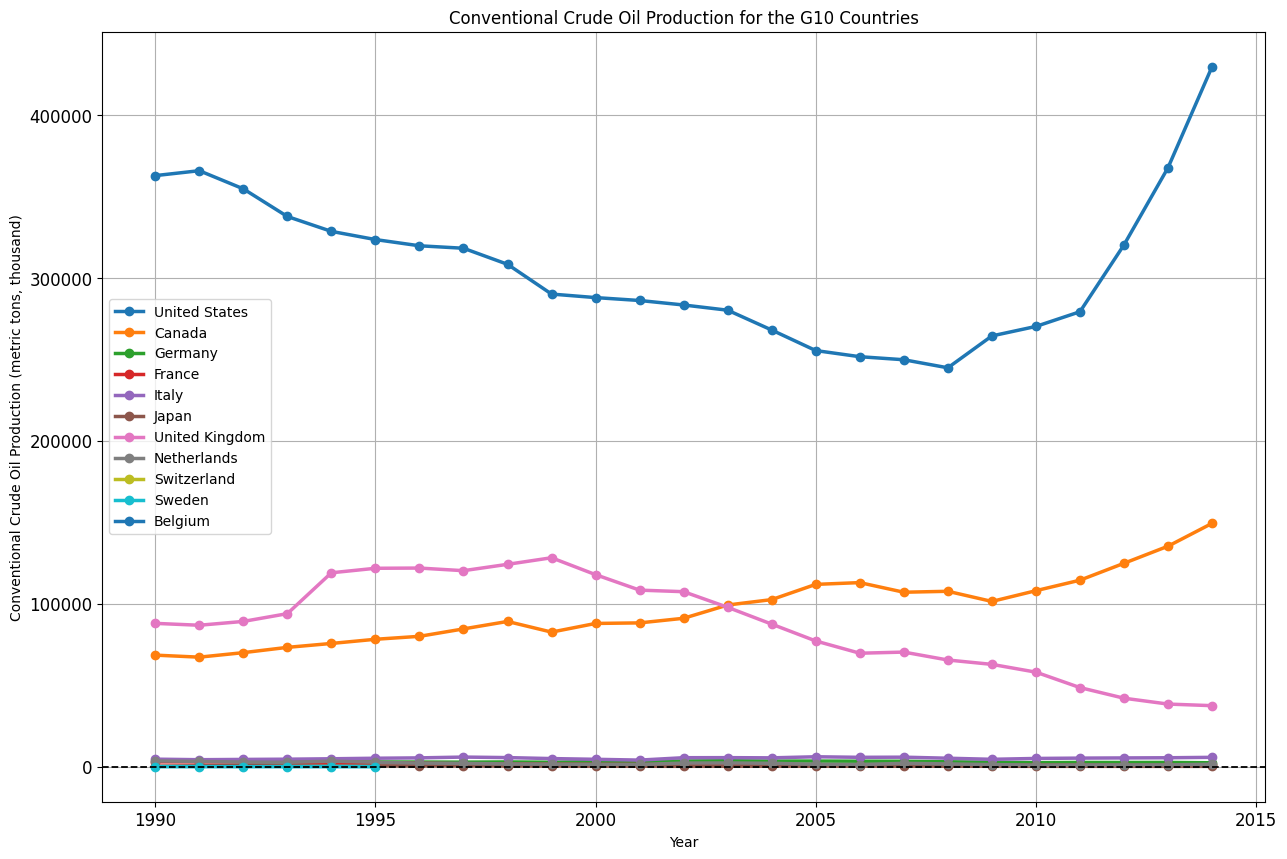

In [35]:
# plotting line graph for each G10 country for the Conventional Crude Production
# List of countries and their corresponding data
countries = [
    ('United States', crudeprod_us),
    ('Canada', crudeprod_canada),
    ('Germany', crudeprod_germany),
    ('France', crudeprod_france),
    ('Italy', crudeprod_italy),
    ('Japan', crudeprod_japan),
    ('United Kingdom', crudeprod_uk),
    ('Netherlands', crudeprod_netherlands),
    ('Switzerland', crudeprod_switzerland),
    ('Sweden', crudeprod_sweden),
    ('Belgium', crudeprod_belgium)
]

# Plotting line graph for each G10 country for the Conventional Crude Production
plt.figure(figsize=(15, 10))

# Loop through each country and its corresponding data frame
for country, data in countries:
    plt.plot(data['year'], data['quantity'], label=country, linewidth=2.5, marker='o')

# Draw horizontal line at y=0 to separate the 0 axis from the lines
plt.axhline(y=0, color='black', linewidth=1.3, linestyle='--')

# Title and labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Year")
plt.ylabel("Conventional Crude Oil Production (metric tons, thousand)")
plt.title("Conventional Crude Oil Production for the G10 Countries")
plt.legend(loc='best')
plt.grid(True)
plt.show()


### Conventional Solar Electricity for G10

In [36]:
# Generating category for each country for the Solar Electricity
solar_us = select_category(us_data, ['solar_electricity'])
solar_canada = select_category(canada_data, ['solar_electricity'])
solar_germany = select_category(germany_data, ['solar_electricity'])
solar_france = select_category(france_data, ['solar_electricity'])
solar_italy = select_category(italy_data, ['solar_electricity'])
solar_japan = select_category(japan_data, ['solar_electricity'])
solar_uk = select_category(uk_data, ['solar_electricity'])
solar_netherlands = select_category(netherlands_data, ['solar_electricity'])
solar_switzerland = select_category(switzerland_data, ['solar_electricity'])
solar_sweden = select_category(sweden_data, ['solar_electricity'])
solar_belgium = select_category(belgium_data, ['solar_electricity'])

In [37]:
# Filtering data for the Solar Electricity Production for the G10 countries
solarcap_us = select_commodity(solar_us,['electricity - total solar production'])
solarcap_canada = select_commodity(solar_canada,['electricity - total solar production'])
solarcap_germany = select_commodity(solar_germany,['electricity - total solar production'])
solarcap_france = select_commodity(solar_france,['electricity - total solar production'])
solarcap_italy = select_commodity(solar_italy,['electricity - total solar production'])
solarcap_japan = select_commodity(solar_japan,['electricity - total solar production'])
solarcap_uk = select_commodity(solar_uk,['electricity - total solar production'])
solarcap_netherlands = select_commodity(solar_netherlands,['electricity - total solar production'])
solarcap_switzerland = select_commodity(solar_switzerland,['electricity - total solar production'])
solarcap_sweden = select_commodity(solar_sweden,['electricity - total solar production'])
solarcap_belgium = select_commodity(solar_belgium,['electricity - total solar production'])

In [38]:
# Combine data into a single DataFrame for plotting
solar_data_combined = pd.DataFrame({
    'Year': solarcap_us['year'],
    'United States': solarcap_us['quantity'],
    'Canada': solarcap_canada['quantity'],
    'Germany': solarcap_germany['quantity'],
    'France': solarcap_france['quantity'],
    'Italy': solarcap_italy['quantity'],
    'Japan': solarcap_japan['quantity'],
    'United Kingdom': solarcap_uk['quantity'],
    'Netherlands': solarcap_netherlands['quantity'],
    'Switzerland': solarcap_switzerland['quantity'],
    'Sweden': solarcap_sweden['quantity'],
    'Belgium': solarcap_belgium['quantity']
})

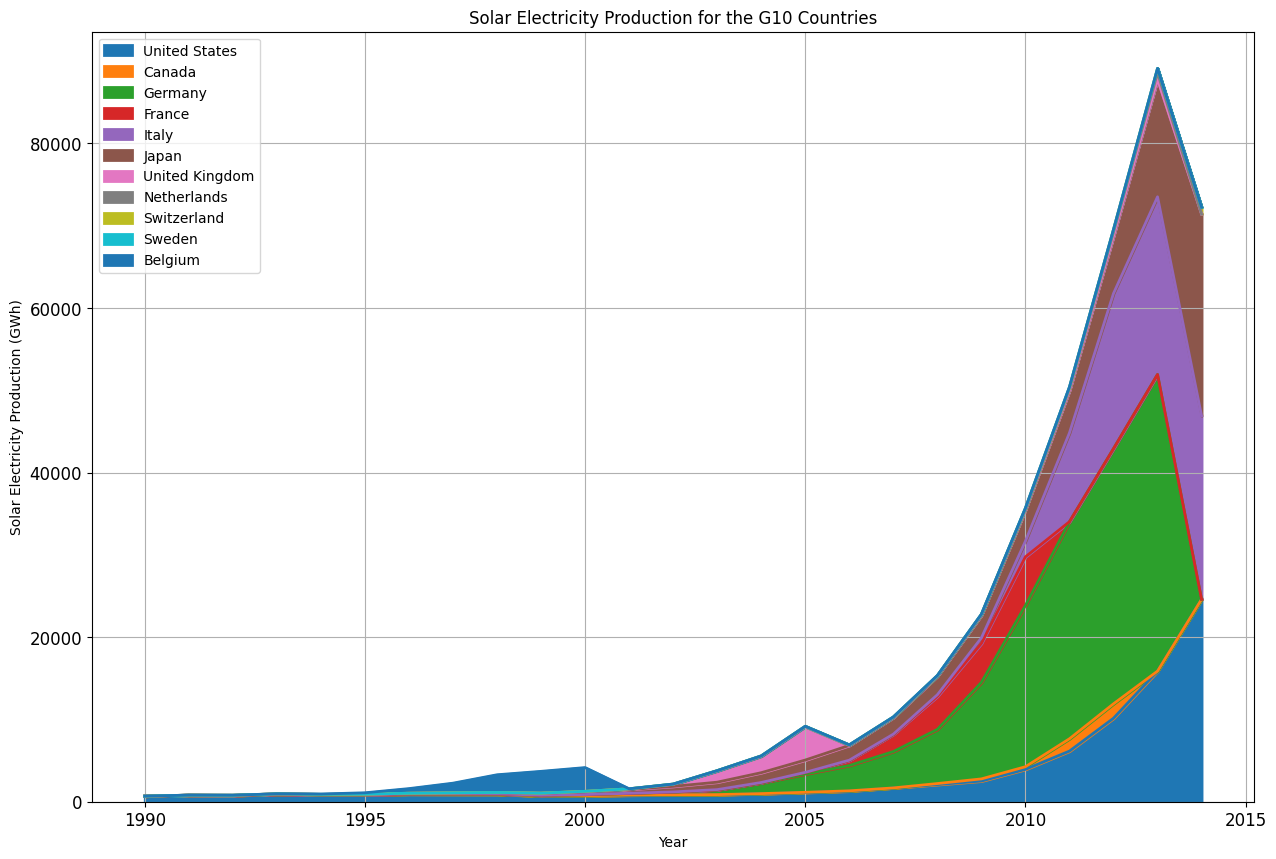

In [39]:
# Plotting stacked area chart for Solar Electricity Production
solar_data_combined.set_index('Year', inplace=True)
solar_data_combined.plot(kind='area', stacked=True, figsize=(15, 10), linewidth=2)

# Title and labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Year")
plt.ylabel("Solar Electricity Production (GWh)")
plt.title("Solar Electricity Production for the G10 Countries")
plt.legend(loc='best')
plt.grid(True)
plt.show()

### Conventional Windy Electricity for G10

In [40]:
# Generating category for each country for the Wind Electricity
wind_us = select_category(us_data, ['wind_electricity'])
wind_canada = select_category(canada_data, ['wind_electricity'])
wind_germany = select_category(germany_data, ['wind_electricity'])
wind_france = select_category(france_data, ['wind_electricity'])
wind_italy = select_category(italy_data, ['wind_electricity'])
wind_japan = select_category(japan_data, ['wind_electricity'])
wind_uk = select_category(uk_data, ['wind_electricity'])
wind_netherlands = select_category(netherlands_data, ['wind_electricity'])
wind_switzerland = select_category(switzerland_data, ['wind_electricity'])
wind_sweden = select_category(sweden_data, ['wind_electricity'])
wind_belgium = select_category(belgium_data, ['wind_electricity'])

In [41]:
# Filtering data for the Wind Electricity Production for the G10 countries
windcap_us = select_commodity(wind_us,['electricity - total wind production'])
windcap_canada = select_commodity(wind_canada,['electricity - total wind production'])
windcap_germany = select_commodity(wind_germany,['electricity - total wind production'])
windcap_france = select_commodity(wind_france,['electricity - total wind production'])
windcap_italy = select_commodity(wind_italy,['electricity - total wind production'])
windcap_japan = select_commodity(wind_japan,['electricity - total wind production'])
windcap_uk = select_commodity(wind_uk,['electricity - total wind production'])
windcap_netherlands = select_commodity(wind_netherlands,['electricity - total wind production'])
windcap_switzerland = select_commodity(wind_switzerland,['electricity - total wind production'])
windcap_sweden = select_commodity(wind_sweden,['electricity - total wind production'])
windcap_belgium = select_commodity(wind_belgium,['electricity - total wind production'])

In [42]:
# Combine data into a single DataFrame for plotting
wind_data_combined = pd.DataFrame({
    'Year': windcap_us['year'],
    'United States': windcap_us['quantity'],
    'Canada': windcap_canada['quantity'],
    'Germany': windcap_germany['quantity'],
    'France': windcap_france['quantity'],
    'Italy': windcap_italy['quantity'],
    'Japan': windcap_japan['quantity'],
    'United Kingdom': windcap_uk['quantity'],
    'Netherlands': windcap_netherlands['quantity'],
    'Switzerland': windcap_switzerland['quantity'],
    'Sweden': windcap_sweden['quantity'],
    'Belgium': windcap_belgium['quantity']
})


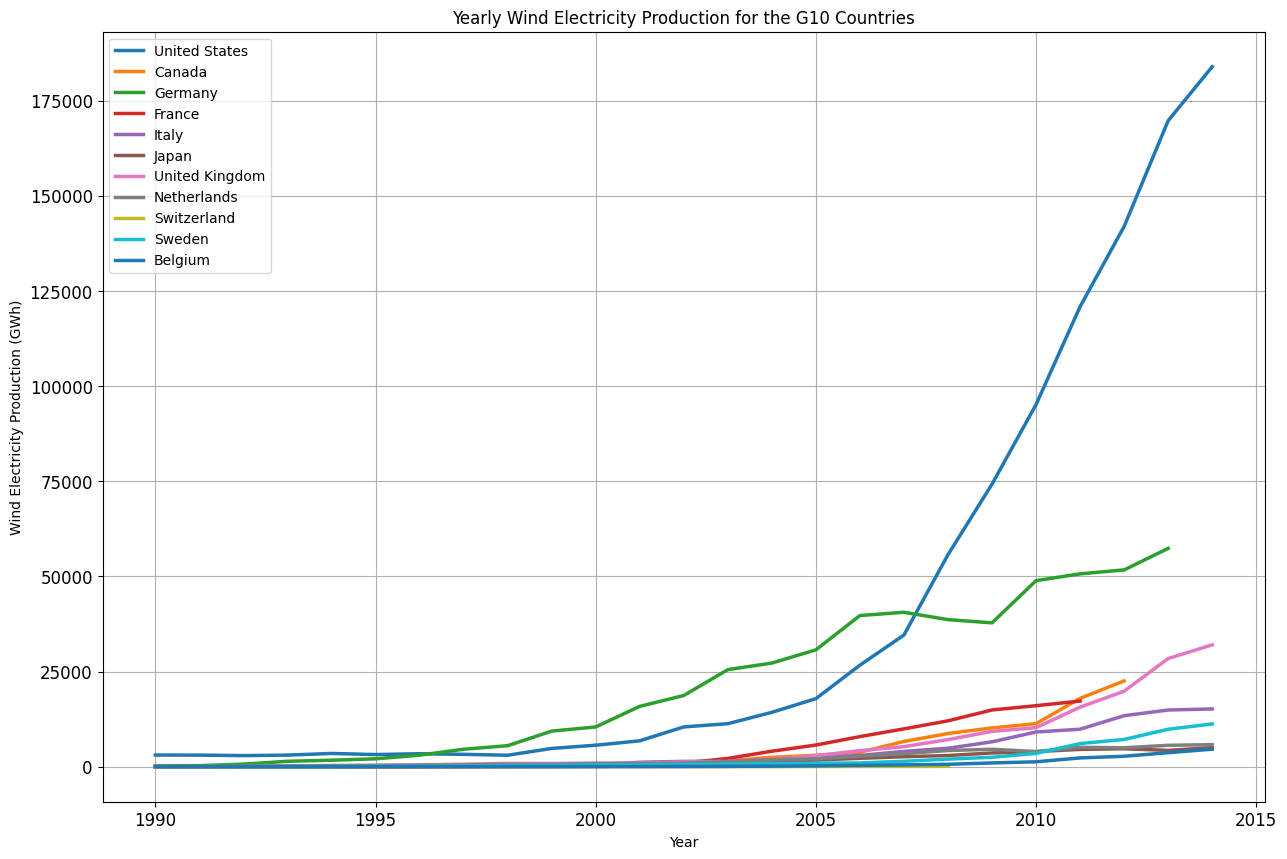

In [43]:
import matplotlib.pyplot as plt

wind_data_combined.set_index('Year', inplace=True)
plt.figure(figsize=(15, 10))

# Loop through each country and plot its data
for column in wind_data_combined.columns:
    plt.plot(wind_data_combined.index, wind_data_combined[column], label=column, linewidth=2.5)

# Title and labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Year")
plt.ylabel("Wind Electricity Production (GWh)")
plt.title("Yearly Wind Electricity Production for the G10 Countries")
plt.legend(loc='best')
plt.grid(True)
plt.show()


## 4.Energy Trends in Balkan Countries
This analysis examines energy trends in Balkan countries using the International Energy Statistics dataset.

In [44]:
#Define Balkan Countris
balkan_countries = [
    'Albania', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Greece',
    'Turkey', 'T.F.Yug.Macedonia', 'Romania', 'Serbia and Montenegro', 'Slovenia'
]

In [45]:
df_balkan = df_input[df_input['country_or_area'].isin(balkan_countries)].copy()
# Convert 'year' to datetime and then extract the year
df_balkan['year'] = pd.to_datetime(df_balkan['year'], format='%Y')
df_balkan['year'] = df_balkan['year'].dt.year

In [46]:
df_balkan

country_or_area                commodity_transaction  year  \
45               Greece   Additives and Oxygenates - Exports  2014   
46               Greece   Additives and Oxygenates - Exports  2013   
47               Greece   Additives and Oxygenates - Exports  2012   
48               Greece   Additives and Oxygenates - Exports  2011   
106             Romania   Additives and Oxygenates - Exports  2014   
...                 ...                                  ...   ...   
1189389          Turkey  Electricity - total wind production  2002   
1189390          Turkey  Electricity - total wind production  2001   
1189391          Turkey  Electricity - total wind production  2000   
1189392          Turkey  Electricity - total wind production  1999   
1189393          Turkey  Electricity - total wind production  1998   

                            unit  quantity  quantity_footnotes  \
45        Metric tons,  thousand       2.0                 NaN   
46        Metric tons,  thousand       5.0                 NaN   
47        Metric tons,  thousand      22.0                 NaN   
48        Metric tons,  thousand      15.0                 NaN   
106       Metric tons,  thousand       0.0                 NaN   
...                          ...       ...                 ...   
1189389  Kilowatt-hours, million      48.0                 NaN   
1189390  Kilowatt-hours, million      62.0                 NaN   
1189391  Kilowatt-hours, million      33.0                 NaN   
1189392  Kilowatt-hours, million      21.0                 NaN   
1189393  Kilowatt-hours, million       5.0                 NaN   

                         category continent  
45       additives_and_oxygenates    Europe  
46       additives_and_oxygenates    Europe  
47       additives_and_oxygenates    Europe  
48       additives_and_oxygenates    Europe  
106      additives_and_oxygenates    Europe  
...                           ...       ...  
1189389          wind_electricity      Asia  
1189390          wind_electricity      Asia  
1189391          wind_electricity      Asia  
1189392          wind_electricity      Asia  
1189393          wind_electricity      Asia  

[85996 rows x 8 columns]

In [47]:
# Aggregate total quantity by country for the entire period
total_quantity_by_country = df_balkan.groupby('country_or_area')['quantity'].sum().reset_index()

# Display the aggregated data
total_quantity_by_country.head()


country_or_area      quantity
0                 Albania  2.045482e+07
1  Bosnia and Herzegovina  2.216257e+07
2                Bulgaria  1.606398e+08
3                 Croatia  3.521628e+07
4                  Greece  1.450315e+08

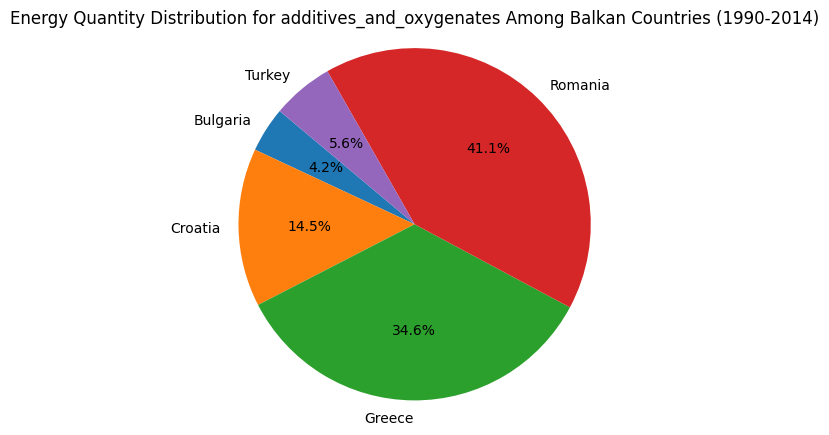

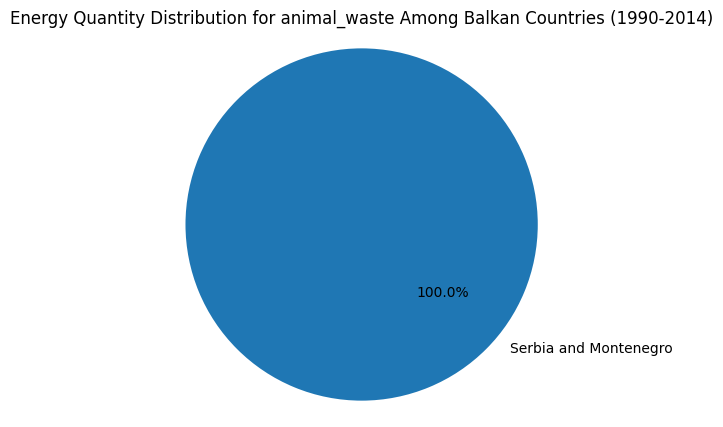

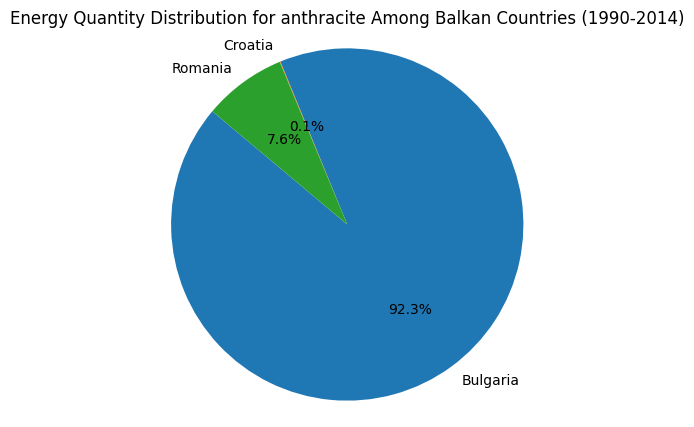

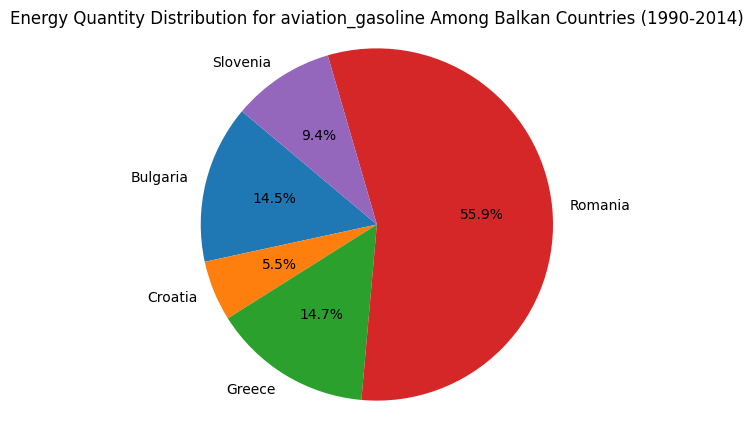

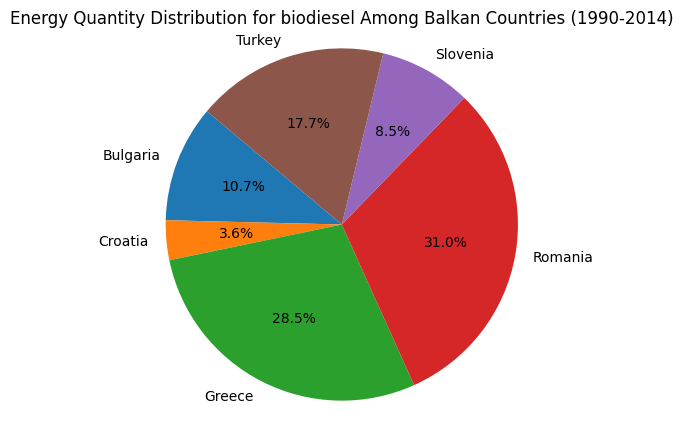

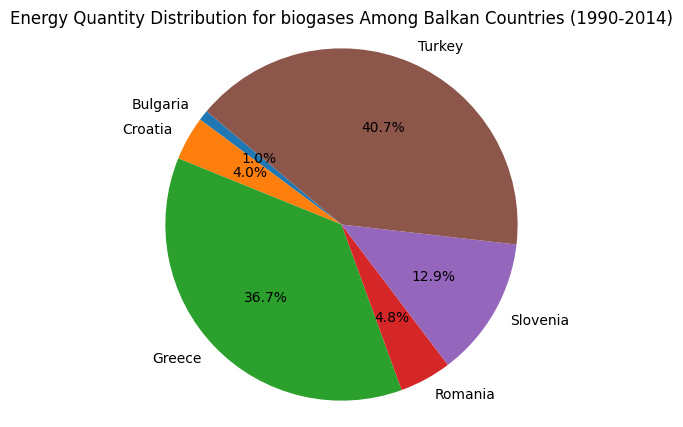

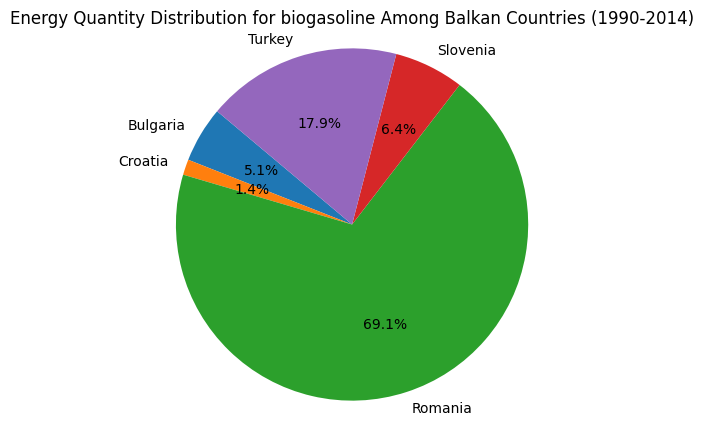

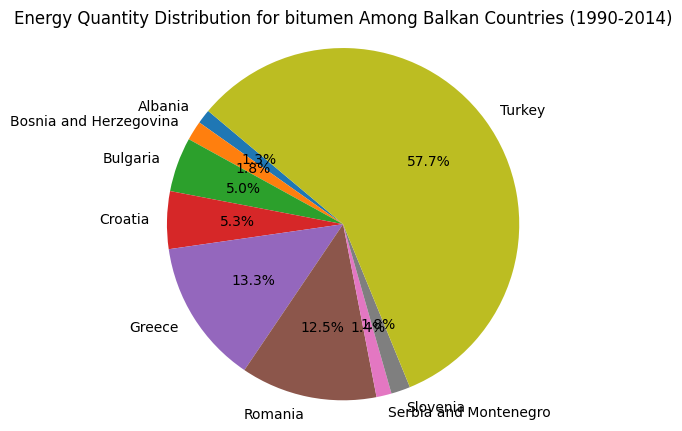

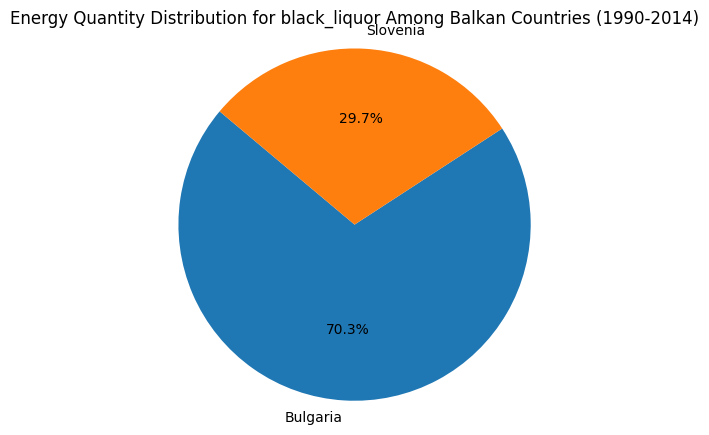

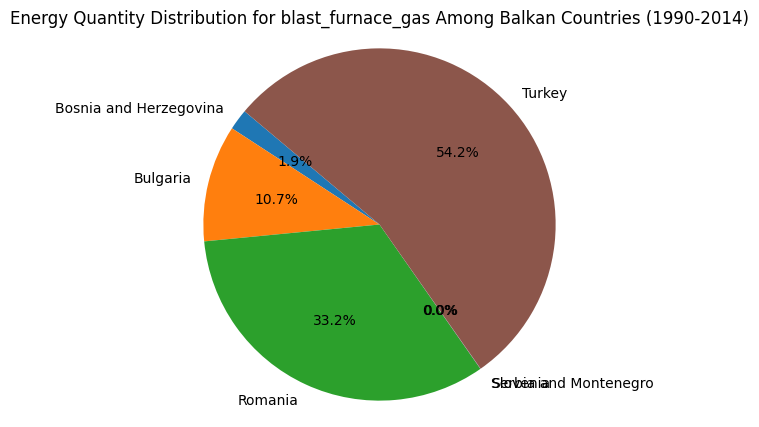

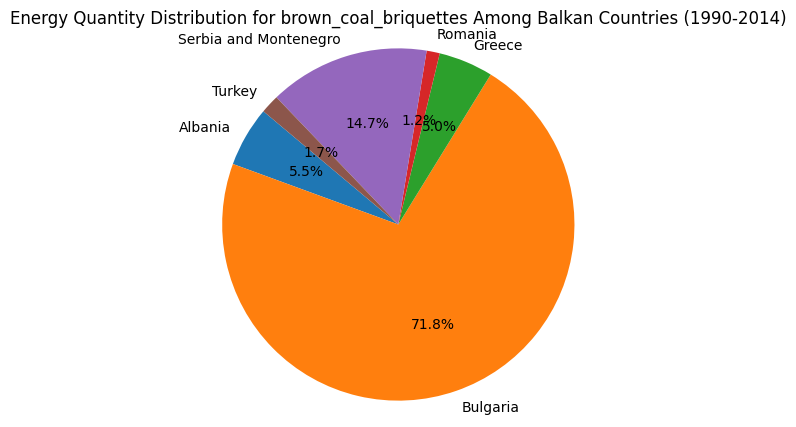

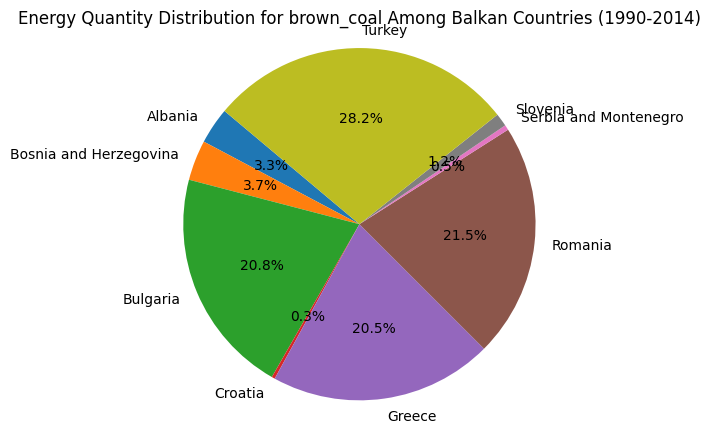

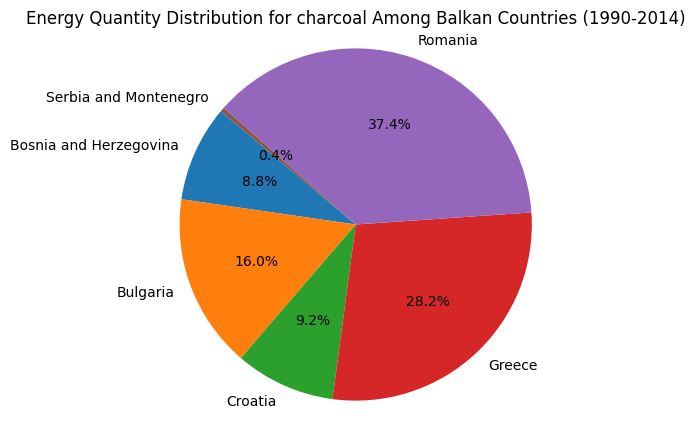

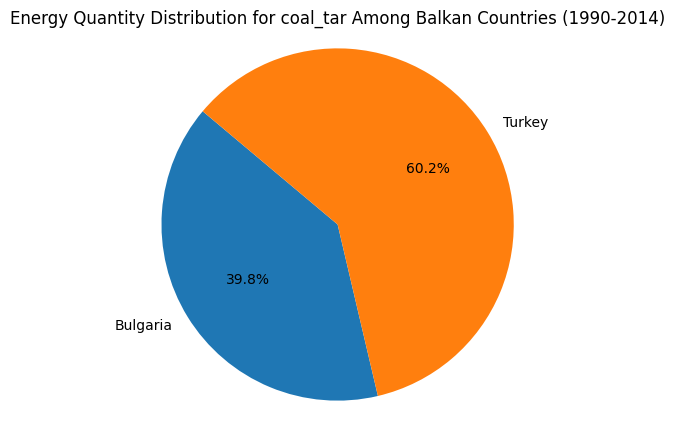

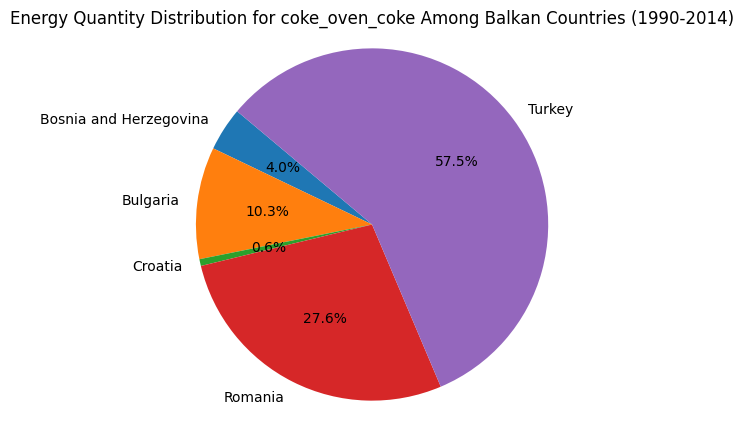

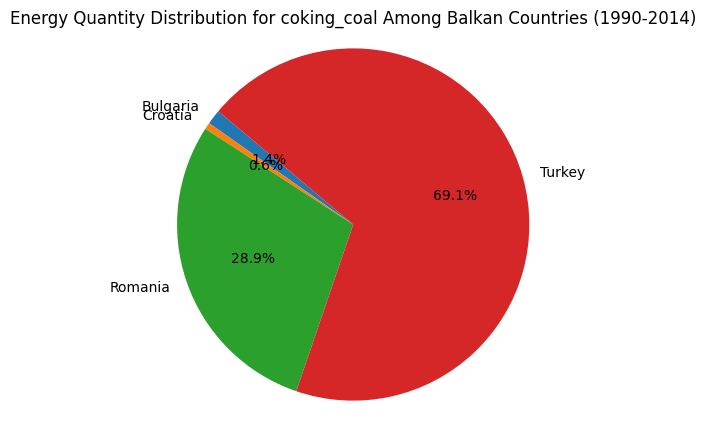

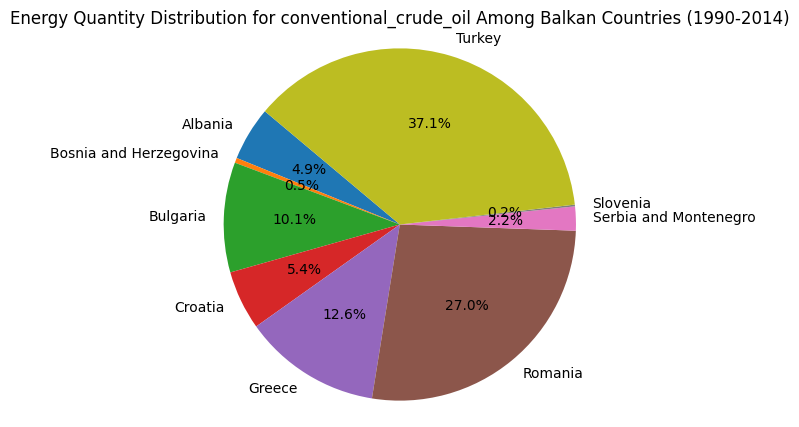

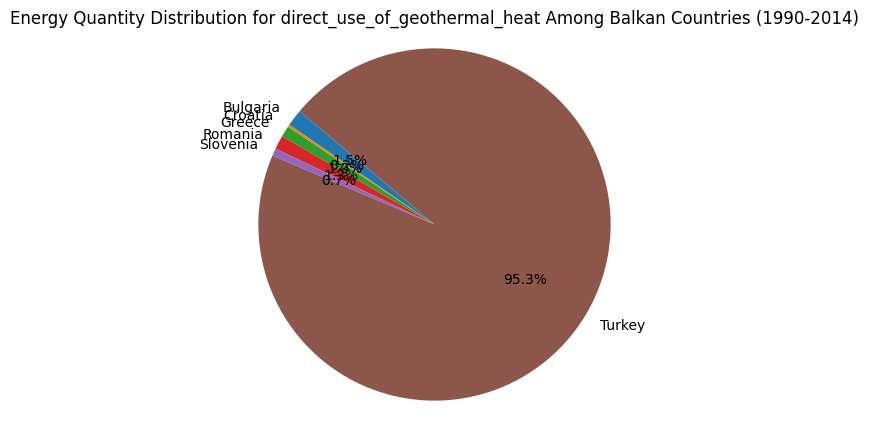

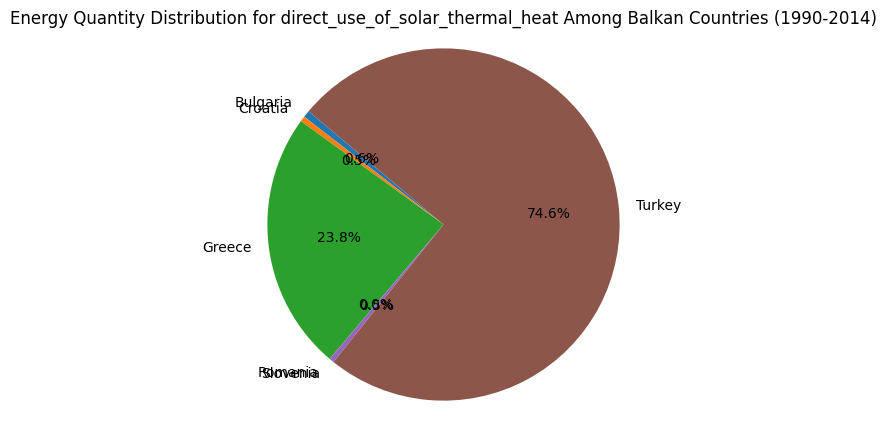

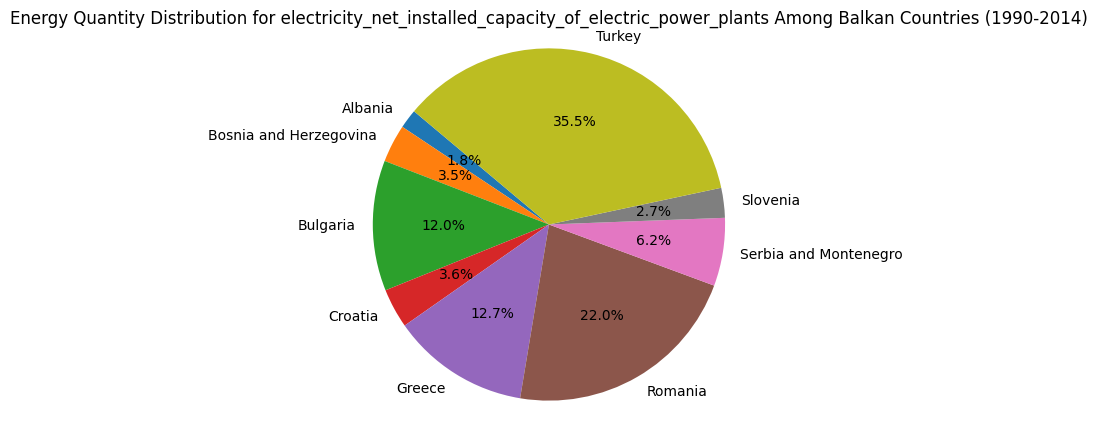

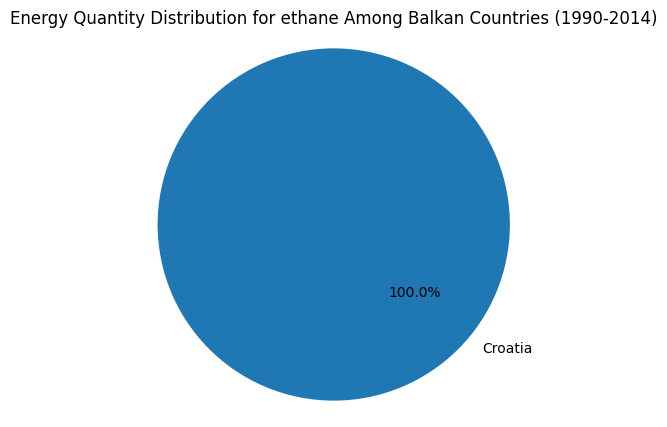

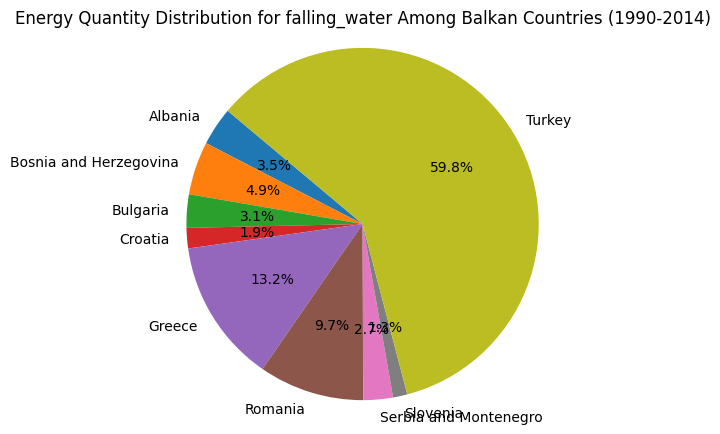

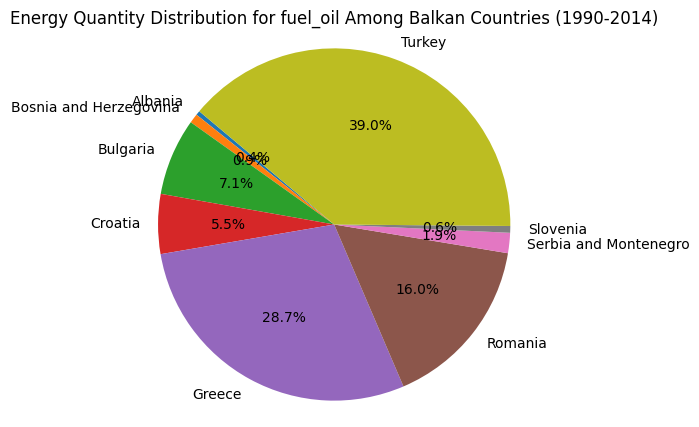

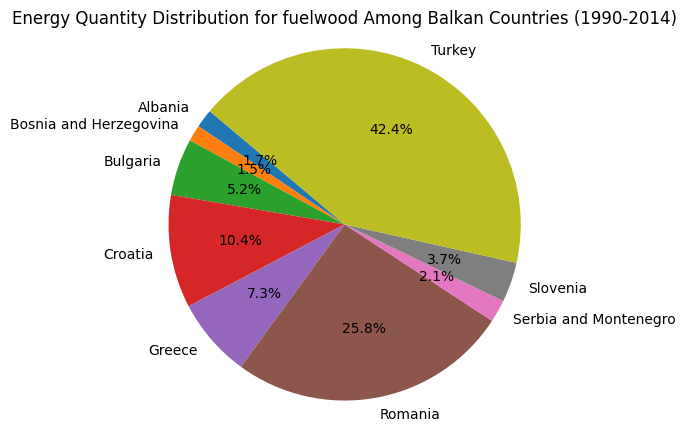

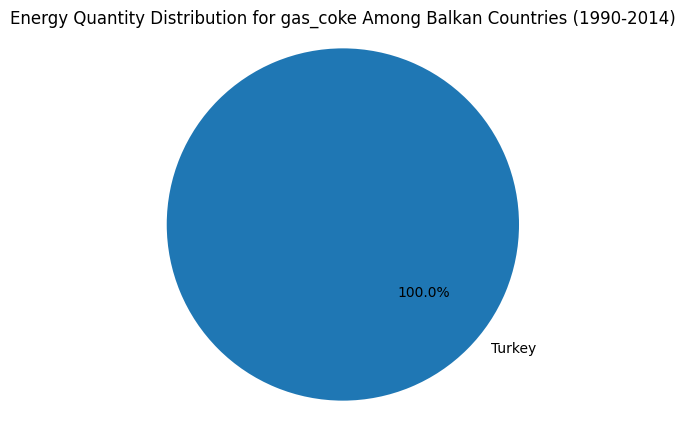

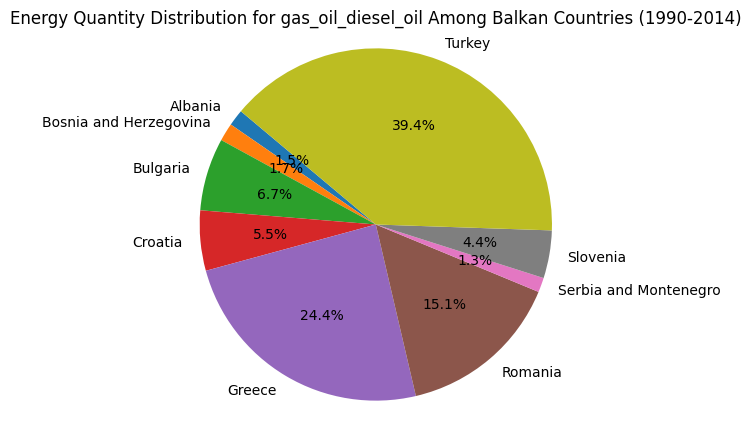

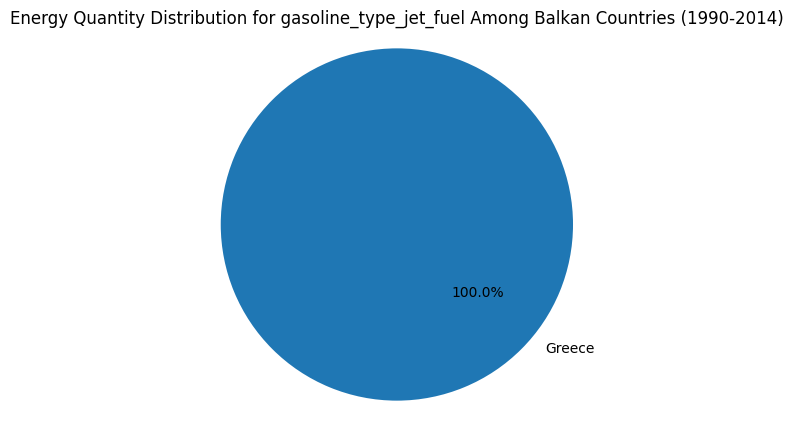

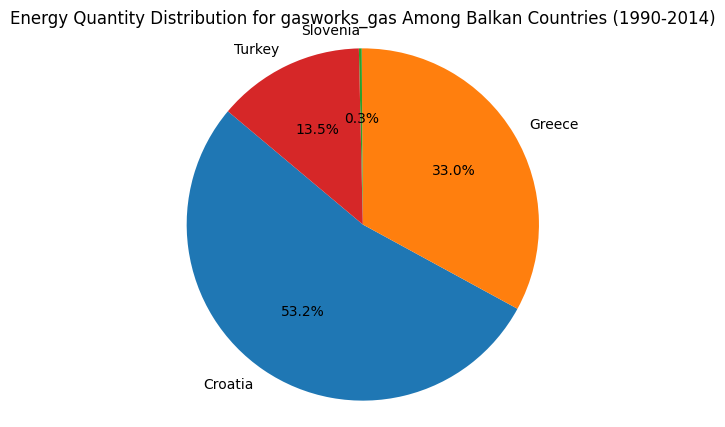

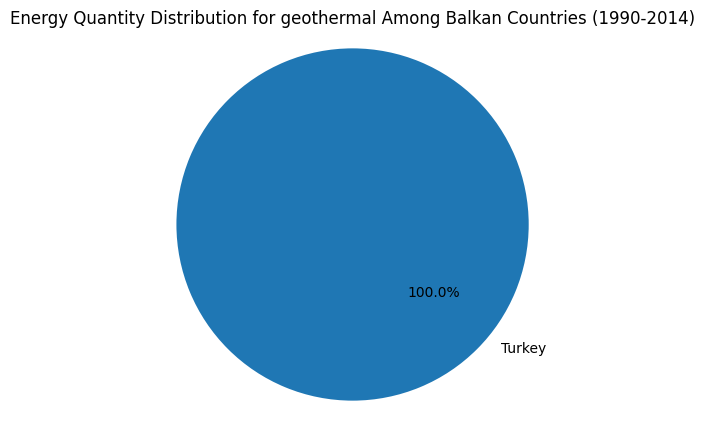

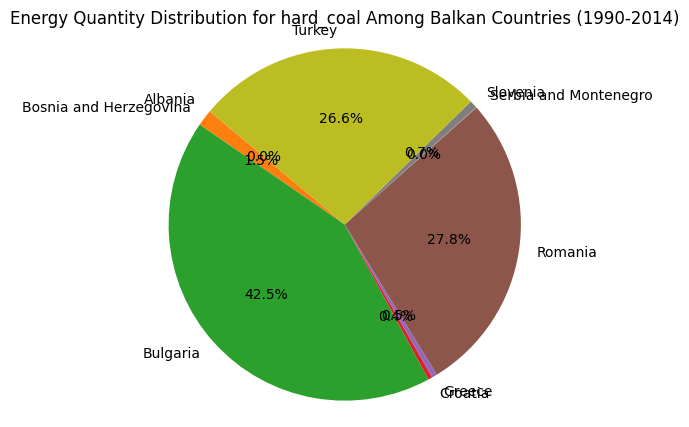

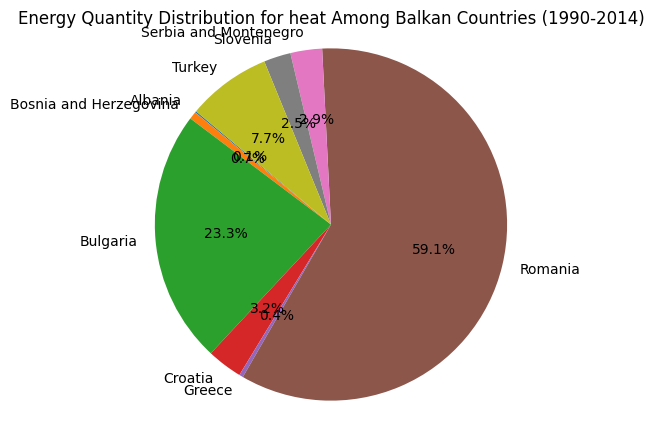

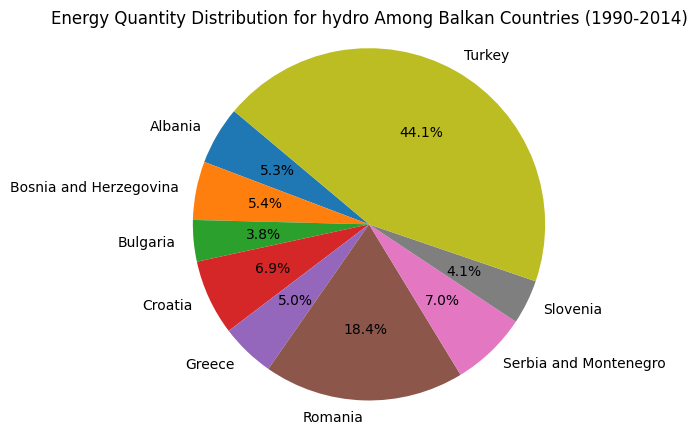

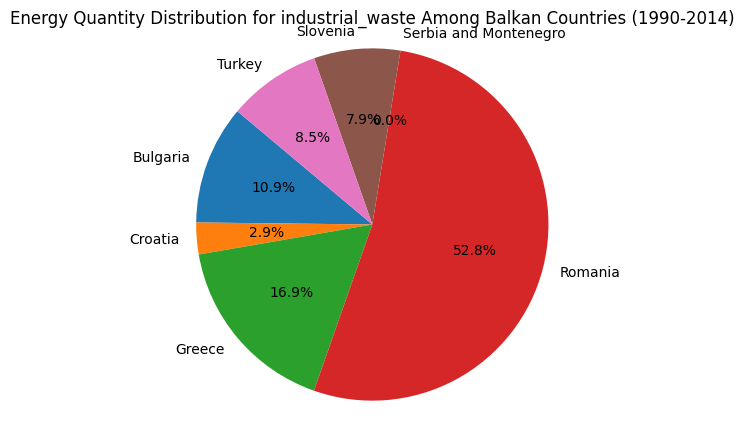

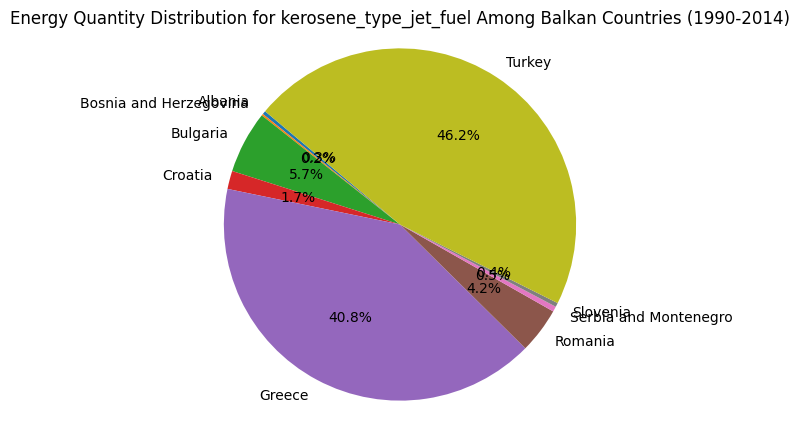

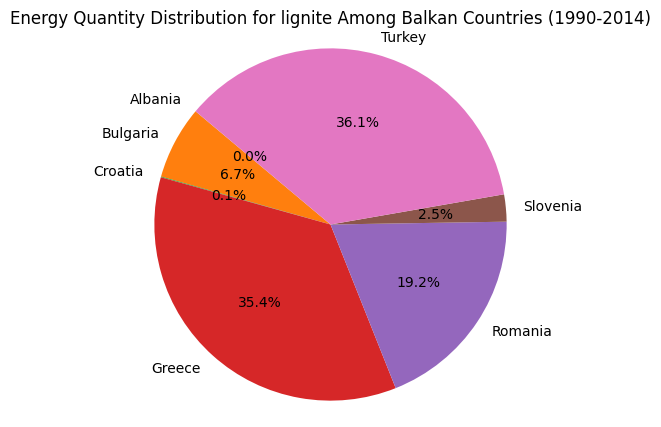

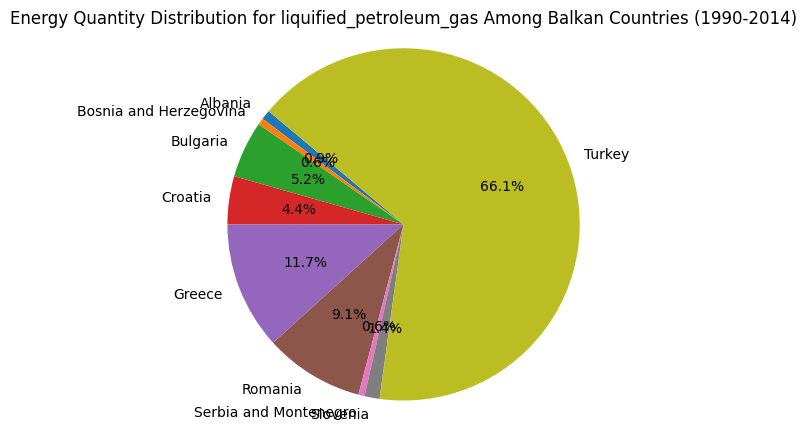

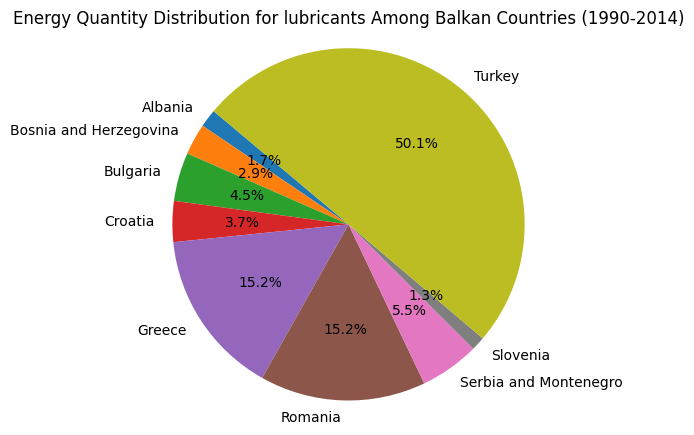

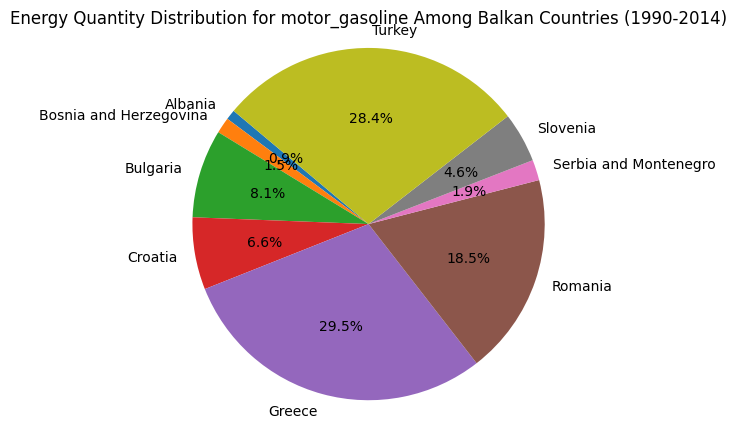

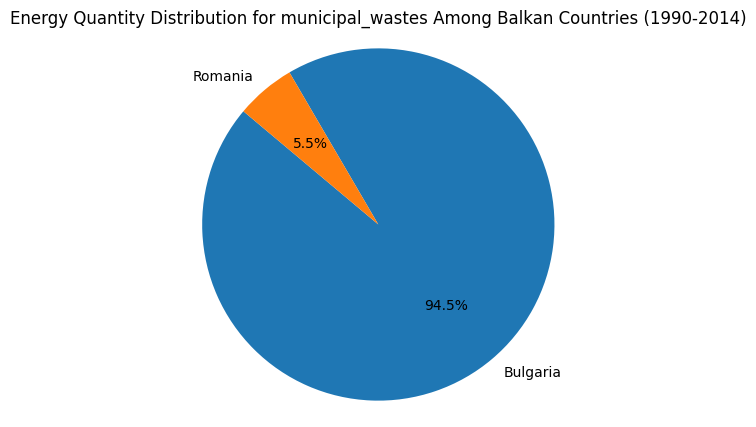

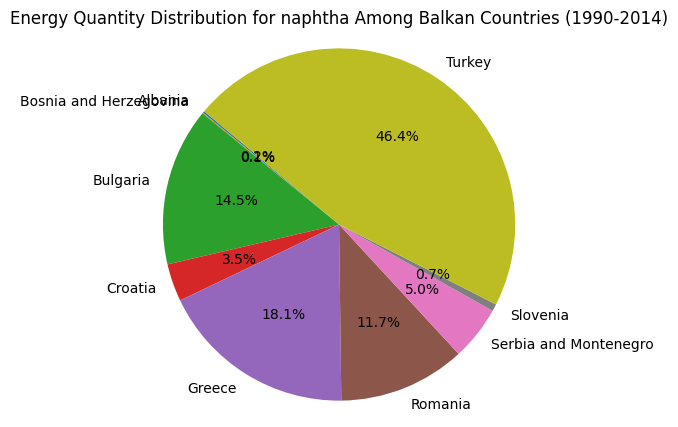

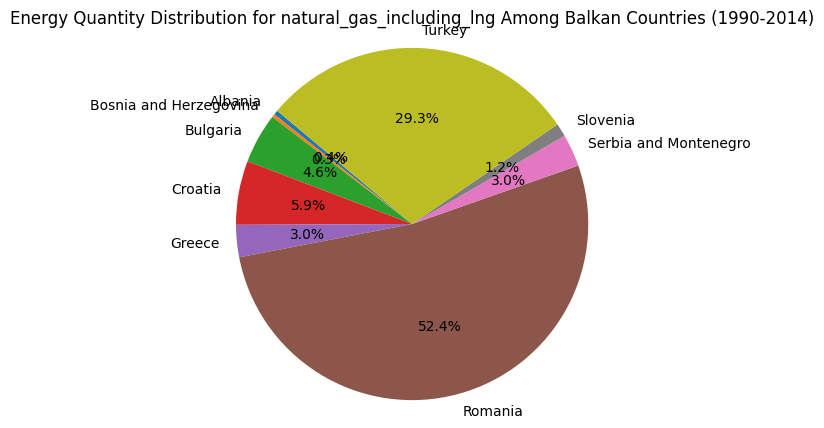

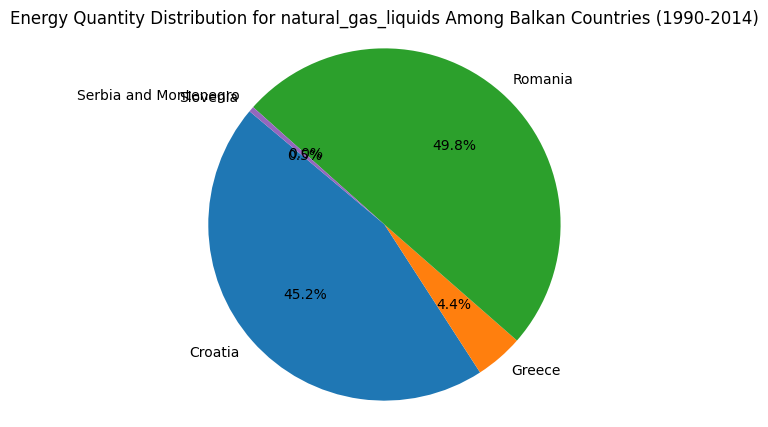

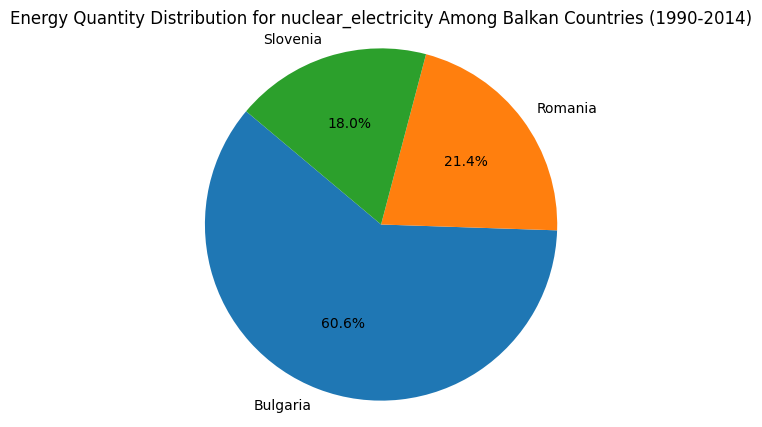

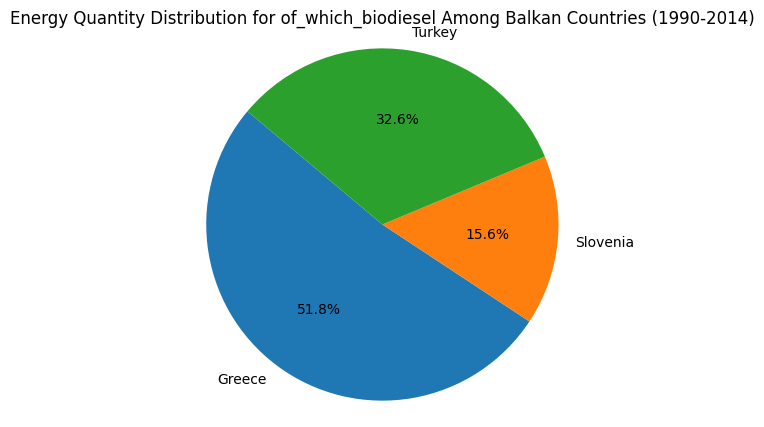

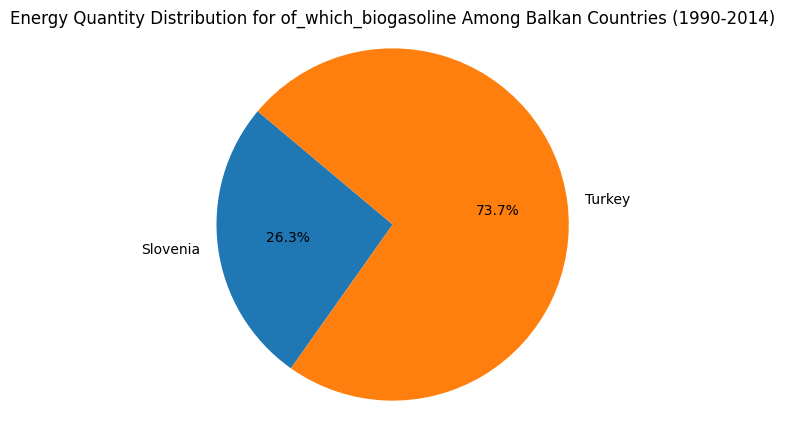

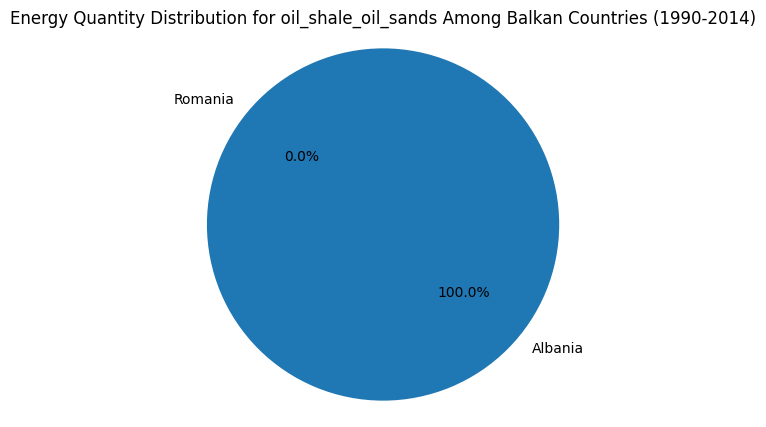

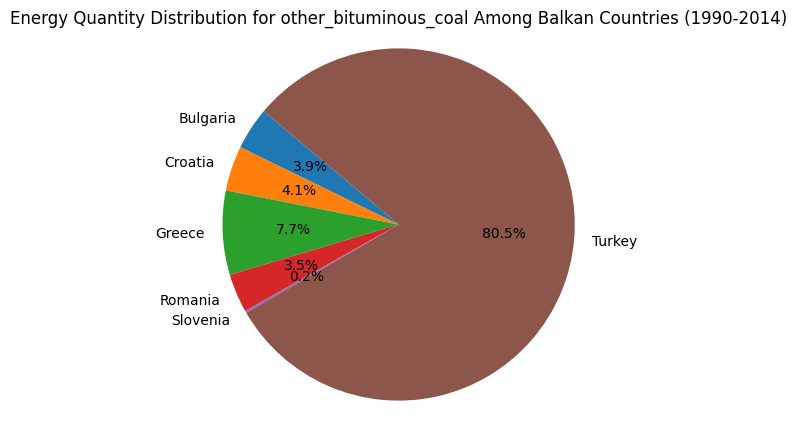

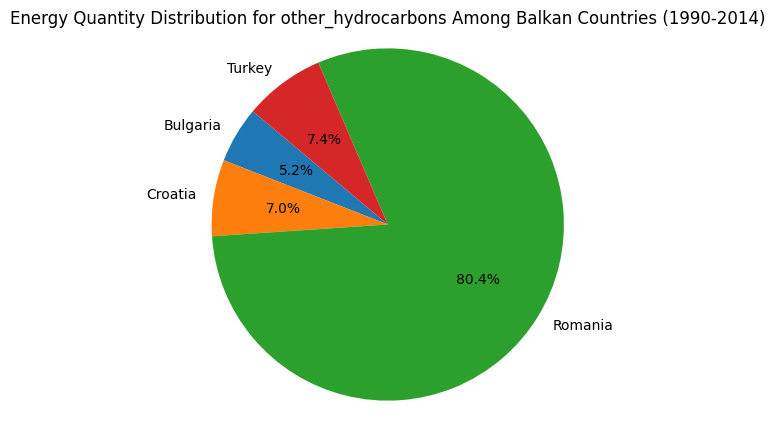

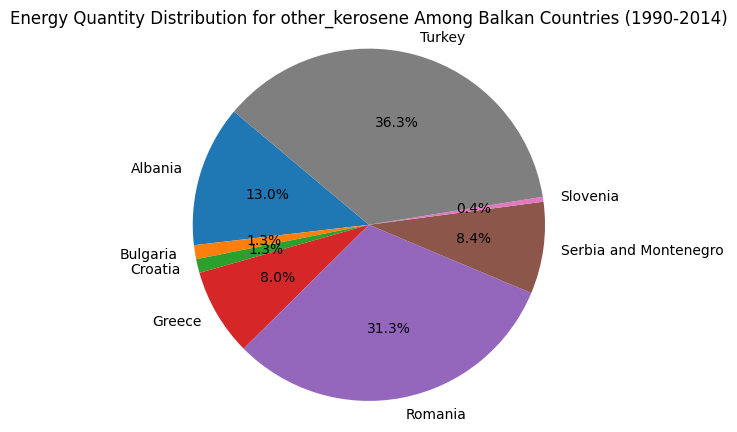

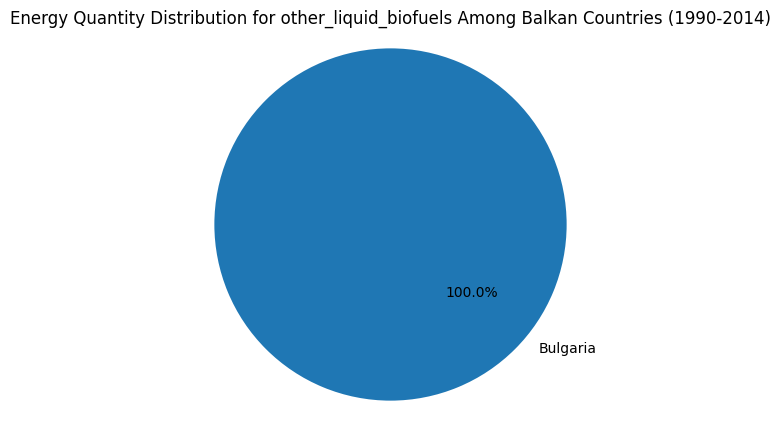

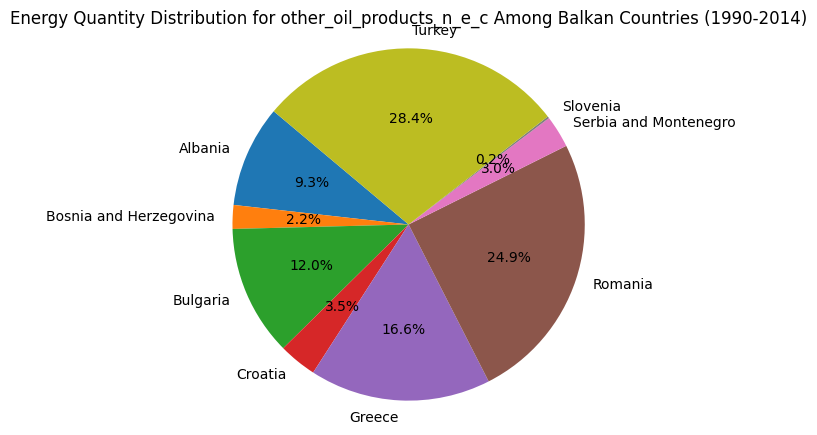

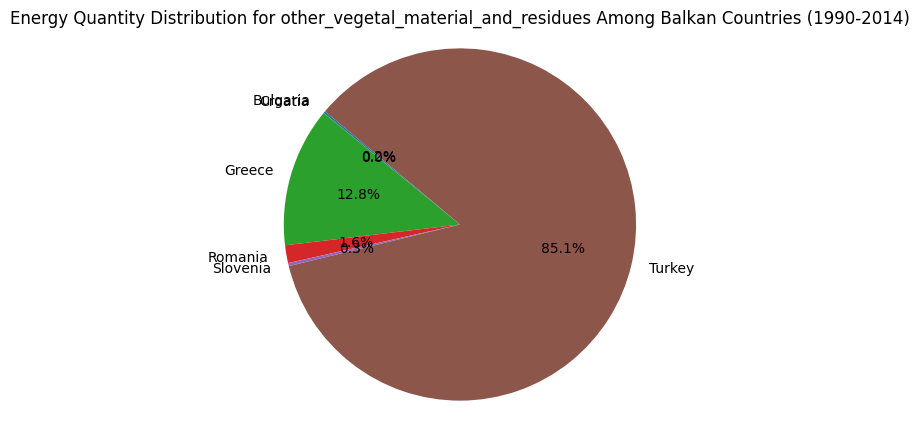

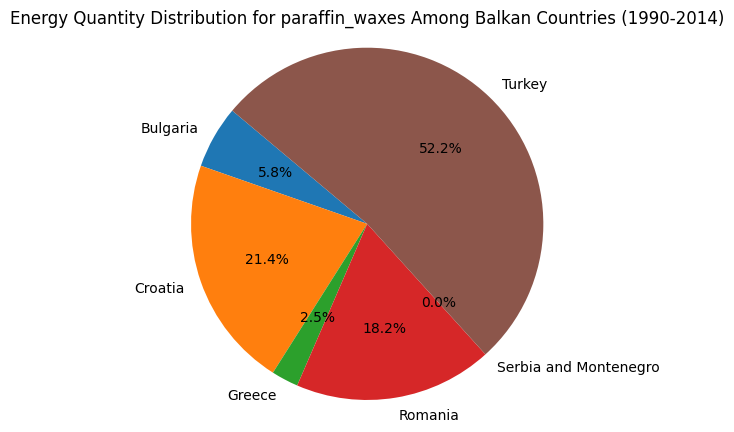

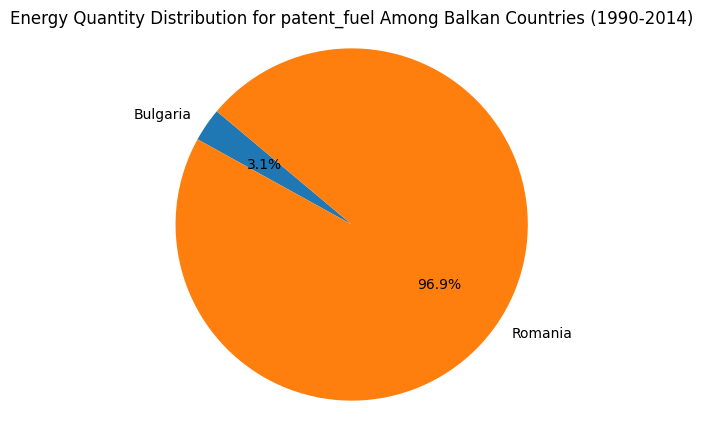

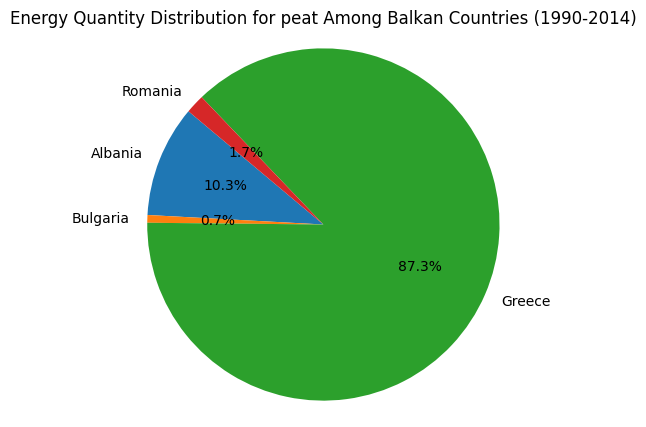

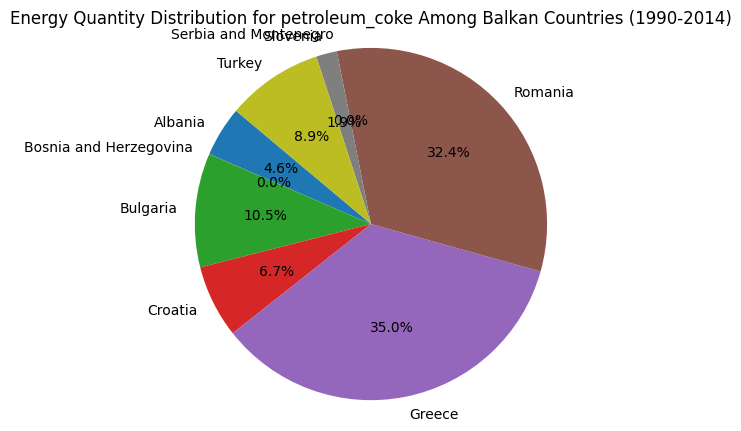

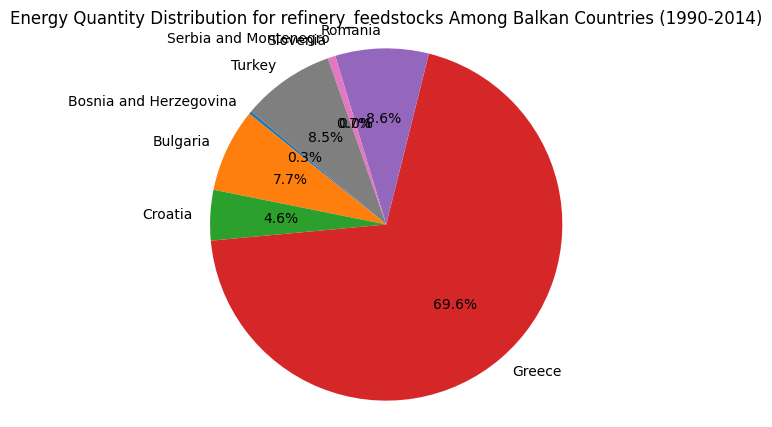

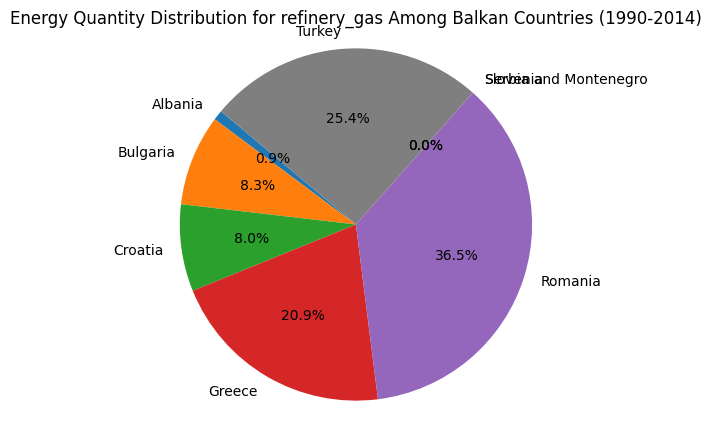

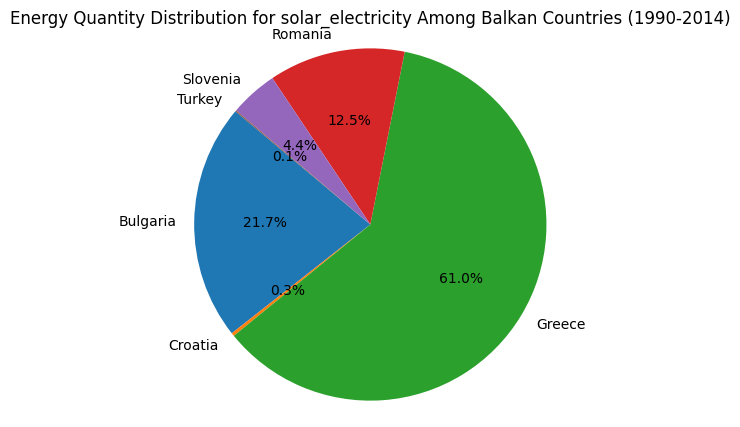

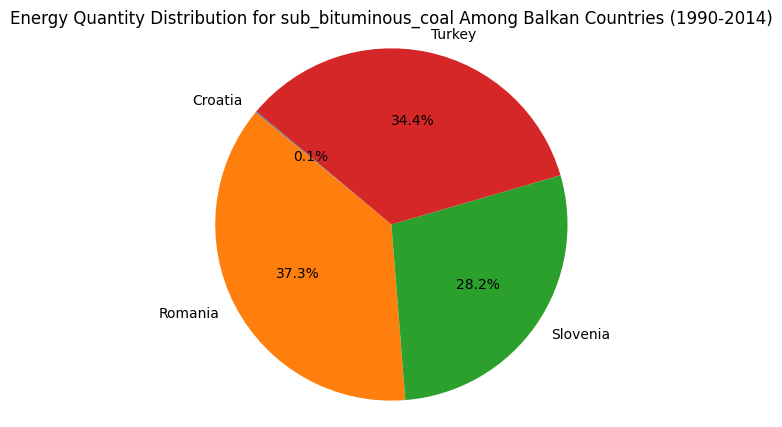

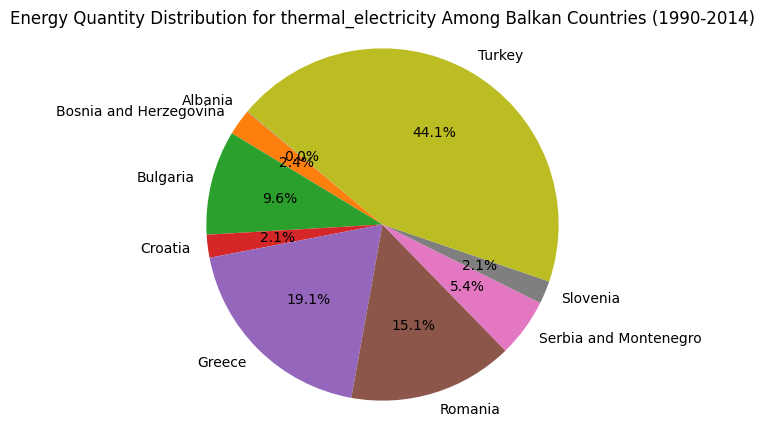

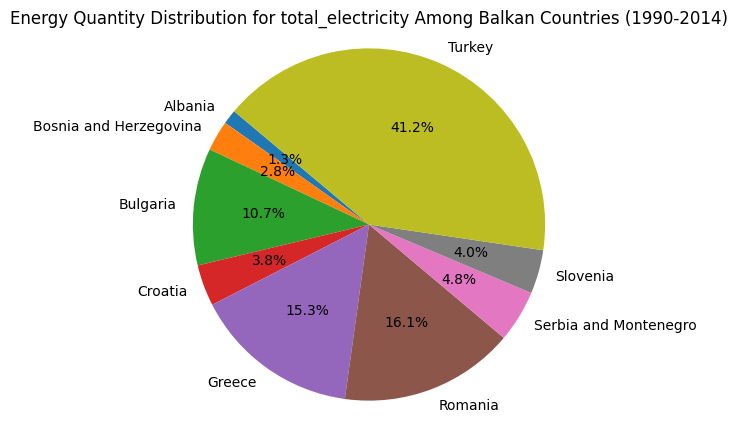

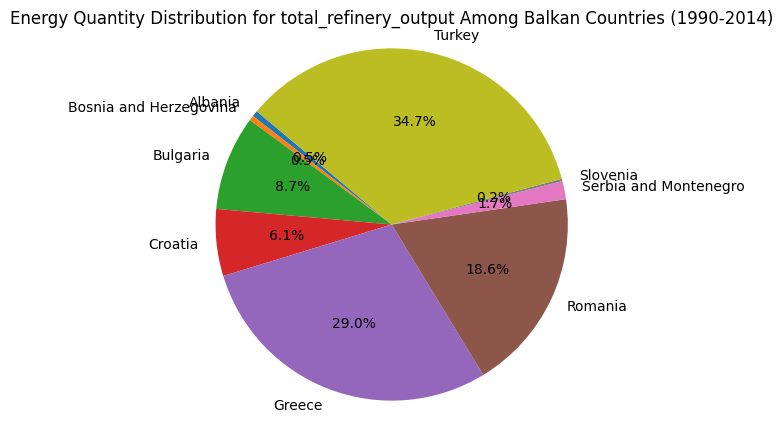

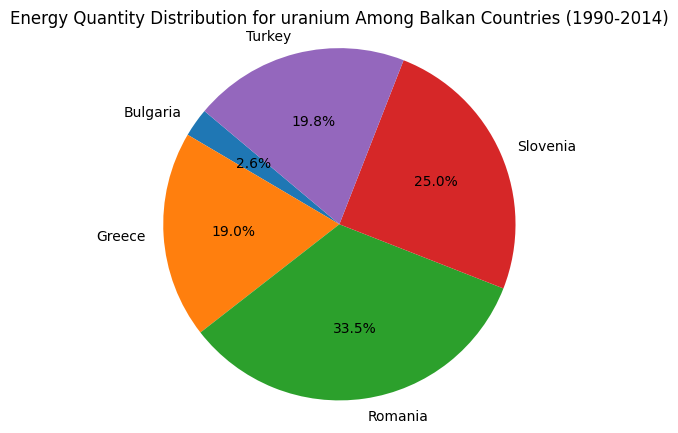

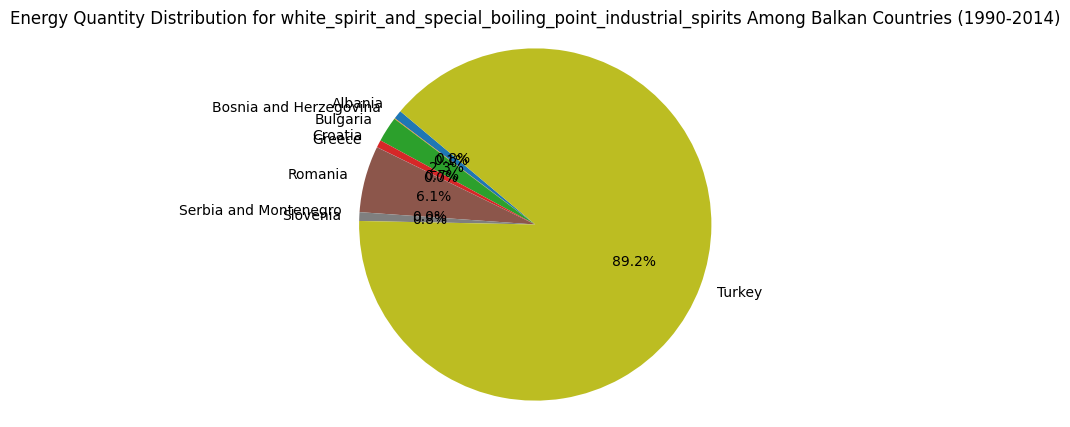

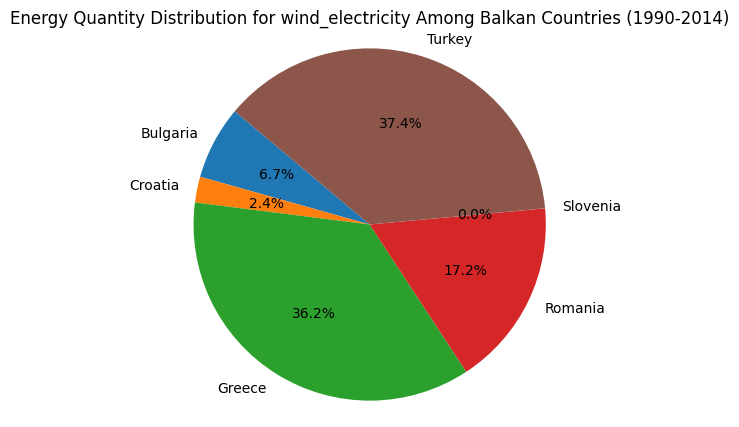

In [48]:
# Define the common categories to analyze
common_categories = df_balkan['category'].unique()

# Plot pie charts for each common category
for category in common_categories:
    category_data = df_balkan[df_balkan['category'] == category]
    total_quantity_by_country_category = category_data.groupby('country_or_area')['quantity'].sum().reset_index()

    plt.figure(figsize=(5, 5))
    plt.pie(total_quantity_by_country_category['quantity'], labels=total_quantity_by_country_category['country_or_area'], autopct='%1.1f%%', startangle=140)
    plt.title(f'Energy Quantity Distribution for {category} Among Balkan Countries (1990-2014)')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()


# Prediction Model

In [49]:
!pip install scikit-learn


In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [51]:
# Filter for Greece
df_greece=df_input[df_input['country_or_area'] == 'Greece'].copy()


In [52]:
df_greece

country_or_area                commodity_transaction  year  \
45               Greece   Additives and Oxygenates - Exports  2014   
46               Greece   Additives and Oxygenates - Exports  2013   
47               Greece   Additives and Oxygenates - Exports  2012   
48               Greece   Additives and Oxygenates - Exports  2011   
286              Greece   Additives and Oxygenates - Imports  2014   
...                 ...                                  ...   ...   
1188606          Greece  Electricity - total wind production  1994   
1188607          Greece  Electricity - total wind production  1993   
1188608          Greece  Electricity - total wind production  1992   
1188609          Greece  Electricity - total wind production  1991   
1188610          Greece  Electricity - total wind production  1990   

                            unit  quantity  quantity_footnotes  \
45        Metric tons,  thousand       2.0                 NaN   
46        Metric tons,  thousand       5.0                 NaN   
47        Metric tons,  thousand      22.0                 NaN   
48        Metric tons,  thousand      15.0                 NaN   
286       Metric tons,  thousand     221.0                 NaN   
...                          ...       ...                 ...   
1188606  Kilowatt-hours, million      37.0                 NaN   
1188607  Kilowatt-hours, million      47.0                 NaN   
1188608  Kilowatt-hours, million       8.0                 NaN   
1188609  Kilowatt-hours, million       2.0                 NaN   
1188610  Kilowatt-hours, million       2.0                 NaN   

                         category continent  
45       additives_and_oxygenates    Europe  
46       additives_and_oxygenates    Europe  
47       additives_and_oxygenates    Europe  
48       additives_and_oxygenates    Europe  
286      additives_and_oxygenates    Europe  
...                           ...       ...  
1188606          wind_electricity    Europe  
1188607          wind_electricity    Europe  
1188608          wind_electricity    Europe  
1188609          wind_electricity    Europe  
1188610          wind_electricity    Europe  

[11753 rows x 8 columns]

In [53]:
# Check the number of rows per year
rows_per_year = df_greece['year'].value_counts().sort_index()
print(rows_per_year)


year
1990    408
1991    419
1992    430
1993    438
1994    433
1995    430
1996    453
1997    470
1998    461
1999    460
2000    461
2001    472
2002    461
2003    466
2004    472
2005    479
2006    485
2007    493
2008    494
2009    481
2010    481
2011    494
2012    550
2013    535
2014    527
Name: count, dtype: int64


In [54]:
# Convert 'year' to datetime and then extract the year
df_greece['year'] = pd.to_datetime(df_greece['year'], format='%Y')
df_greece['year'] = df_greece['year'].dt.year

# Aggregate quantity by year
df_greece_yearly = df_greece.groupby(['year','category'])['quantity'].sum().reset_index()

In [55]:
# Prepare a dictionary to store models and future predictions for each category
category_models = {}
category_predictions = {}
mse_list = []
r2_list = []

# Get the unique categories
categories = df_greece_yearly['category'].unique()
split_year = 2010

In [56]:
for category in categories:
    # Filter data for the current category
    data_category = df_greece_yearly[df_greece_yearly['category'] == category]

    # Prepare features and target
    X = data_category[['year']]
    y = data_category['quantity']

    # Train-test split (train on years <= split_year and test on years > split_year)
    X_train = X[X['year'] <= split_year]
    X_test = X[X['year'] > split_year]
    y_train = y[X['year'] <= split_year]
    y_test = y[X['year'] > split_year]

    # Check if there are enough samples for training and testing
    if len(X_train) == 0 or len(X_test) == 0:
        continue

    # Train a Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Store the model
    category_models[category] = model

    # Make predictions for the next 5 years (2015-2019)
    future_years = pd.DataFrame({'year': range(2015, 2020)})
    predictions = model.predict(future_years)

    # Store the predictions
    future_years['predicted_quantity'] = np.round(predictions,2)
    category_predictions[category] = future_years

    # Evaluate the model on the test set
    y_pred_test = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_test)
    r2 = r2_score(y_test, y_pred_test)
    mse_list.append(mse)
    r2_list.append(r2)

In [57]:
# Print the quantity predictions for each category for each year
for category, predictions in category_predictions.items():
    print(f'Category: {category}')
    print(predictions)
    print('-' * 30)


Category: additives_and_oxygenates
   year  predicted_quantity
0  2015              518.41
1  2016              537.17
2  2017              555.93
3  2018              574.70
4  2019              593.46
------------------------------
Category: aviation_gasoline
   year  predicted_quantity
0  2015               27.21
1  2016               27.56
2  2017               27.91
3  2018               28.26
4  2019               28.62
------------------------------
Category: biogases
   year  predicted_quantity
0  2015            13146.09
1  2016            13752.20
2  2017            14358.32
3  2018            14964.44
4  2019            15570.55
------------------------------
Category: bitumen
   year  predicted_quantity
0  2015             3037.07
1  2016             3108.56
2  2017             3180.06
3  2018             3251.55
4  2019             3323.04
------------------------------
Category: brown_coal
   year  predicted_quantity
0  2015         -1079644.14
1  2016         -1383154.99

In [58]:
# Evaluate the overall model performance
overall_mse = np.mean(mse_list)
overall_r2 = np.mean(r2_list)
print(f'Overall Mean Squared Error: {round(overall_mse,2)}')
print(f'Overall R^2 Score: {round(overall_r2,2)}')

Overall Mean Squared Error: 1857531075938.05
Overall R^2 Score: -11.11
